<a href="https://colab.research.google.com/github/OlafWolkenhauer/Modelling-the-corona-pandemic/blob/master/SUIR_Modelling_V03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The timing of contact restrictions and pro-active testing balances the socio-economic impact of a lockdown with the control of infections

### Saptarshi Bej, Olaf Wolkenhauer

Dept of Systems Biology & Bioinformatics

University of Rostock
[www.sbi.uni-rostock.de](https://www.sbi.uni-rostock.de)




# Abstract

During the SARS-CoV-2 pandemic, numerous mathematical models have been
developed. Reporting artefacts and missing data
about asymptomatic spreaders, imply considerable margins of uncertainty
for model-based predictions. Epidemiological models can however also be used to investigate the consequences of measures to control the pandemic, reflected in changes to parameter values.

We present a SIR-based, SUIR model in which the influence of
testing and a reduction of contacts is studied by distinguishing
`Unidentified' and `Identified' spreaders of infections. The model uses
four ordinary differential equations and is kept deliberately simple to
investigate general patterns occurring from testing and contact
restrictions. The model goes beyond other efforts, by introducing time
dependent parameter curves that represent different strategies in
controlling the pandemic.

Our analysis reveals the effect of `pro-active' testing for the design
of contact restriction measures. By pro-active testing we mean testing
beyond those people who show symptoms. The simulations can explain why
the timing of contract restrictions and pro-active testing is important.
The model can also be used to study the consequence of different
strategies to exit from lockdown.

Our SUIR model is implemented in Python and is made available through a
Juypter Notebooks. This an extensive documentation of the derivation and
implementation of the model, as well as transparent and reproducible
simulation studies. Our model should contribute to a better
understanding of the role of testing and contact restrictions.

# Introduction

During the SARS-CoV-2 pandemic, numerous mathematical models have been
developed. Using these models to predict infections, for a particular
region or country has been very difficult to do a lack of sufficiently
rich and time accurate datasets. Reporting artefacts and missing data
about asymptomatic spreaders, imply considerable margins of uncertainty
for predictions.

There is however a second use of models, that investigate general
pattern and can answer questions, including: What is the role of testing
in controlling the pandemic? What difference does an early restriction
of contacts (lockdown) have on the timing and size of infections have?
What effect does the length of the lockdown have on the occurrence of a
second peak have?

We present here a SIR-based, SUIR model in which the influence of
testing and a reduction of contacts is studied by distinguishing
'Unidentified' and 'Identified' spreaders of infections. The model uses
four ordinary differential equations and is kept deliberately simple to
investigate general pattern occurring from testing and contact
restrictions. The model goes beyond other efforts, by introducing time
dependent parameter curves that represent different strategies in
controlling the pandemic.

Our analysis reveals the effect of 'pro-active' testing for the design
of contact restriction measures. By pro-active testing we mean testing
beyond those people who show symptoms. The simulations can explain why
the timing of contract restrictions and pro-active testing is important.
The model can also be used to study the consequence of different
strategies to exit from lockdown, whether a short lockdown, combined
with pro-active testing, can be sufficient or whether an exit strategy
with a cyclic pattern of restrictions and no restrictions is
appropriate. Our simulations also show that a short lockdown or period
lockdown-exit pattern bring substantial reductions in the number of
infections, without a long-term lockdown of large parts of the economy.

Since both, a total lockdown and pro-active testing will be difficult to
achieve, especially in the early phase of a pandemic. Our analysis
suggests however that with pro-active testing and strict isolation of
identified spreaders, it is possible to achieve control of the pandemic
without a total lockdown.

Our SUIR model is implemented in Python and is made available through a
Juypter Notebooks. This an extensive documentation of the derivation and
implementation of the model, as well as transparent and reproducible
simulation studies. Our model should contribute to a better
understanding of the role of testing and contact restrictions.


## Using this Jupyter Notebook

This document is a Jupyter Notebook, combining text and Python code. Opened in [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb), the code can be run inside a browser, without the need to install any third-party programs, or Python. Cells with code can be executed by clicking on the top left of the box. All cells in the notebook can be run together from the "runtime" menu.

## Loading Python libraries

In [0]:
# import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
# sns.set(style="darkgrid")
import matplotlib.pyplot as plt
# %matplotlib inline # This leads to static images in the notebook (png) files.
# plt.style.use('seaborn-whitegrid')
# from plotly.offline import iplot, init_notebook_mode
# from plotly.subplots import make_subplots
# import plotly.graph_objs as go
# from pathlib import Path

## Compartmental SUIR Modelling


During the initial phase of the SARS-CoV-2 pandemic, most tests conducted were on people showing symptoms. We are here particularly interested in "pro-active" testing, which we interpret to be testing individuals even without symptoms. Pro-active testing may consider the following scenarios:

- Random testing of individuals (for example, walk-in testing stations installed in South Korea)
- Strategic testing such as testing of all persons who have been in contact with some identified patient 
- Testing of all persons in identified 'hotspots' of the disease

We assume that the health system is economically and socially capable of organizing an pro-active testing scenario. In such a case, as opposed to the SEIR model, one does not need to consider the the compartment E of exposed individuals, because pro-active testing is done irrespective of the fact whether a person in susceptible, exposed, infected.

Our model is quite similar to the basic [SIR model](https://www.nature.com/articles/s41592-020-0822-z), but with the $I$ compartment split into two parts, one capturing identified spreaders, and another un-identified spreaders. The construction of our model can also be considered a simplified version of a model proposed by [Singh and Adhikary](https://arxiv.org/pdf/2003.12055.pdf). We interpret the model slightly differently to investigate the importance of pro-active testing in controlling the pandemic. We consider the following groups ("compartments"):





- $S$: Susceptible; People who can still become infected

- $U$: Unidentified (silent) spreaders;  People who can spread the infection and have not been tested to be COVID positive yet

- $I$: Identified spreaders; People who can spread the infection and have been tested to be COVID positive

- $R$: Resolved; Resolved cases (deaths+recovery)


Note that, we use the notion of Unidentified spreaders and Identified spreaders in this model since the Unidentified spreaders have a large role in spreading the disease. We usually do not know the actual number of infections. During the initial phase of the outbreak, PCR based tests could only detect an active infection. So, we do not consider the Infection compartment as usually done in classical SEIR model. Rather we defined the compartment as 'Identified spreaders', a variable that can be reliably evaluated, simply because the primary data usually available publicly is the number of cases appearing each day. Note that, these numbers do not represent the total number of infections or total number of spreaders, but only the number of persons who have been tested. The reported number of identified cases is also highly dependant on the degree of testing performed by a medical system. This model considers a parameter quantifying the probabiltiy of a disease spreader to be identified. In a practical scenario, this probability is likely to be high when there is pro-active testing. Moreover, it considers parameters accounting for social isolation assuming that, an identified spreader would be rigorously quarentined and would thus contribute significantly less in spreading the epidemic.

In the next section, we derive the equation of the model step-by-step.


### Construction of the model



Let $S(t)$ count how many individuals are susceptible at time $t$. This group is at risk of becoming infected.

Assuming that most people are not isolated, they can get infected. The initial condition for $S$ would thus be approximately $N-U(0)-I(0)-R(0)$, where $N$ is the size of the population at risk of contracting the virus. 

The group $U(t)$ at time $t$ are unidentified (silent) spreaders - people who are contagious, who can spread the infection but have not been tested to be positive yet. 

Any increase to $U$, implies an equal decrease of $S$. Any term that adds to the equation for $U$, will be mirrored by the same term with a minus in front in the equation for $S$. 

The group of identified spreaders at time $t$ is denoted $I(t)$. The individuals have been tested positive, and can spread the disease. Once tested positive, one can assume that these person will be isolated reasonably well. This means the contribution of this group to the decrease of $S$ should be small, compared to the contribution from $U$. We shall denote these contributions of $U$ and $I$ to the decrease of $S$ with $\kappa_I$  and $\kappa_U$. 

We refer to $\kappa_I$ as the **Isolation Index**, defining the effectiveness of isolating identified spreaders. A low value of $\kappa_I$ refers to good quarantining, through strict isolation of identified spreaders.

The **Contact restriction Index** $\kappa_U$ defines the contribution of unidentified spreaders on the infection of susceptibles. If measures, like contact restrictions are implemented, their effectiveness would be reflected by $\kappa_U$. A low value of  $\kappa_U$, refers to strict contact restrictions as would happen during a lockdown.

One would then expect that $\kappa_U \gg \kappa_I$

Any increase of identified spreaders $I$, implies an equal decrease of $S$. Any term that adds to the equation for $I$, will be mirrored by the same term with a minus in front in the equation for $S$.

Finally, we combine death and recoveries in the subpopulation denoted by $R(t)$. Considering subpopulations $S$, $U$, $I$, and $R$, we may refer to our model as a SUIR model. Models, where individuals move from one subpopulation “compartment”) to another, are also referred to as ‘compartmental models’. Most classical epidemiological models include $E$ for an exposed group, which means that our model slightly deviates from standard models. We deliberately avoided a larger model with more variables. The current coronavirus pandemic has revealed various problems with data generated. The larger the size of the model, the greater the risk of making it unidentifiable. The predictions arising from SEIR type epidemiological models also tend to be sensitive to changes in parameter values. Taken together, during the current crisis numerical predictions of case numbers and specific times (e.g. of peaks) has been difficult. As a consequence, we here focus on a simple model that does not try to focus on values and time points. Instead, the goal is to investigate general pattern and scenarios. An example of such type of modelling that we pursue here is the model by [Uri Alon](https://medium.com/@urialonw/adaptive-cyclic-exit-strategies-from-lockdown-to-suppress-covid-19-and-allow-economic-activity-4900a86b37c7). 



### Building the equations

Denoting by $t$ time in days, the model that looks at daily changes, where $\Delta t$=1, would be represented by difference equations. In epidemiological modelling it is however common to assume  $\Delta t$ to go to zero, so that the model is formulated in terms of differential equations. To then simulate the differential equation model, one introduces a uniform mesh in the, $t_n=n\Delta t$, $n=0,\ldots,N_t$, and seek $S$ at the mesh points. The numerical approximation of $S$ at time $t_n$ is denoted by $S^n$.

In the time interval $\Delta t$ some people will be infected, so $S$ will decrease. Both, $I$ and $U$ contribute to this decrease: 
$$
S^{n+1} = S^n - \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t
$$ 

From what we said above, the equation for $I^{n+1}$ and $U^{n+1}$ will automatically receive the term 
$$
+\beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t
$$

The parameter $\beta$ reflects how easily people get infected during a time interval of unit length (here per day). This is also referred to as the "transmission rate". 

Suppose that during a time interval $T$ we measure that $x$ actual pairwise meetings do occur among $y$ theoretically possible pairings of people from the $S$, $U$ and $I$ subpopulations. The probability that people meet in pairs during time $T$ is, estimated as a relative frequency, $y/x$. From such a statistic we want the probability per unit time, $\mu=x/(yT)$. 

Given the probability $\mu$, the expected number of meetings per time interval of $(\kappa_I  I^n + \kappa_U  U^n) S^n$ possible pairs of people is $\mu ( \kappa_I  I^n + \kappa_U  U^n) S^n$. During a time interval $\Delta t$, there will be $\mu (\kappa_I  I^n + \kappa_U  U^n) S^n \Delta t$ expected number of meetings between susceptibeles, with identified and unidentified people.

Only a fraction of the $\mu (\kappa_I  I^n + \kappa_U  U^n) S^n \Delta t$ meetings are effective in transmitting the virus. Counting that $m$ people get infected in $n$ such pairwise encounters (e.g. 5 are infected in 1000 encounters), we can estimate the probability of being infected as $p=x/y$. The expected number of individuals in the $S$ subpopulation of susceptibles  that in time interval $\Delta t$ catch the virus and get infected is then 
$$
p \mu (\kappa_I  I^n + \kappa_U  U^n) S^n \Delta t
$$

Next, describing the evolution of $I(t)$, we have from the equation of $S$ already one term,
$$
I^{n+1} = I^n + \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t
$$ 

However, there will also be people that either recover, or die, giving us
$$
I^{n+1} = I^n + \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t - \gamma I^n \Delta t
$$

Introducing testing, there will be a proportion $\rho$ and $\epsilon$ of individuals identified by 'pro-active testing' of people without symptoms and testing due to the manifestation of symptoms, respectively. This proportion will move to subpopulation $I$. The rest of them moves to compartment $U$. This gives us for $I^{n+1}$,
$$
I^{n+1} = I^n + (\rho + \epsilon) \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t - \gamma I^n \Delta t
$$

The equation for $U^{n+1}$, can now be constructed from the symmetry that must be there from the other equations:
$$
U^{n+1} = U^n + (1-\rho - \epsilon) \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t - \gamma U^n \Delta t
$$

Changes in the subpopulation $R$ will simply be determined by
$$ 
R^{n+1} = R^n + \gamma ( I^n + U^n ) \Delta t
$$

To summarise, we the model is constructed from the following difference equations:

- $S^{n+1} = S^n - \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t$ 

- $U^{n+1} = U^n + (1-\rho - \epsilon) \beta \left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t - \gamma U^n \Delta t$

- $I^{n+1} = I^n + (\rho + \epsilon) \beta\left(\kappa_I  I^n + \kappa_U  U^n\right) S^n\Delta t - \gamma I^n \Delta t$

- $ R^{n+1} = R^n + \gamma ( I^n + U^n ) \Delta t$



Subtracting the $S^n$, $U^n$, $I^n$, $R^n$ on both sides, and dividing by $\Delta t$, gives us the discretitzed version of differential equations, using the Forward Euler method for $n$=0, ..., $N_t$, over some finite interval $[0,T]$. The corresponding ordinary differential equations are:

- $S' = - \beta\left(\kappa_I  I + \kappa_U  U\right) S$ 

- $U' = (1-\rho - \epsilon) \beta\left(\kappa_I  I + \kappa_U  U\right)  - \gamma U $

- $I' = (\rho + \epsilon) \beta\left(\kappa_I  I + \kappa_U  U\right) S - \gamma I$

- $R' = \gamma ( I + U )$



### Estimating parameter values

For the purpose of our study we shall adopt for initial conditions and values chosen for the key parameters, from the [Nature publication](https://www.nature.com/articles/s41592-020-0822-z) on SIR modelling from 20th April 2020.

The parameter $\beta$ reflects how easily people get infected during a time interval of unit length. This is also referred to as the "transmission rate". $\beta^{-1}$ is the typical/average time between contacts [Bjoernstad et al Nature April 2020](https://www.nature.com/articles/s41592-020-0822-z).

We refer to $\gamma$ as the **Recovery Index**. It is estimated as the inverse of the average duration of illness. The average duration of illness is assumed to be 14 days [Bjoernstad et al Nature April 2020](https://www.nature.com/articles/s41592-020-0822-z). For the SIR model, the relationship between $\beta$ and $\gamma$ is the reproduction number $R=\beta / \gamma$. The basic reproduction number $R(0)$ represents how many new infections are caused at the start of an epidemic by a spreader. Note that this estimation of $R(0)$ also holds for our SUIR model. The reason behind is that, the sum of the compartments $U$ and $I$ essentially is essentially same as the compartment $I_{SIR}$ representing spreaders in the SIR model. The chance of transmission is directly proportional to the contact frequency, i.e., how many close contacts a person makes on an average per day. During the COVID-19 pandemic, the reproduction number has been adopted in several countries as a criteria for lifting contact restrictions measures. For the estimation of $R(t)$ several methods exist and depending on how it is calculated, the estimates can differ quite considerably. In Germany, the Robert Koch Institute has estimated $R(t)$ as the quotient of new daily infections in two successive four day windows. The model from Michael Meyer-Herrmann from the Helmholtz Centre, Braunschweig, also used a sliding window, of seven days, but also included a [model](https://gitlab.com/simm/covid19/secir/-/wikis/Report) in the estimate of $R(t)$.

A virus incubates for some time after it enters a human but before it causes symptoms. The incubation period for the new coronavirus SARS-CoV-2 typically ranges from two to 14 days, with the median being four or five days. During some of the incubation period, a person can be infectious. The parameter $\epsilon$ can be interpreted as the **inverse of the incubation period** (in days). We estimate this to be around 5 days. The incubation period is the average number of days after which a person shows perceivable symptoms and is therefore forced to take a COVID test. $\epsilon$ is thus linked to testing focusing on those with symptoms, and a low $\epsilon$, corresponds to a longer incubation period, which means that more spreaders will be unidentified.

**Pro-active Testing Index** $\rho$ describes the proportion of spreaders identified as COVID +ve. This parameter relates to the aggressiveness of testing. We assume that the more pro-active the testing is, the higher the probability of the detection of a previously unidentified spreader. A low value of $\rho$, corresponds to little aggresisve testing, implying more unidentified spreaders. A high value of $\rho$, describes pro-active testing, reducing the number of unidentified spreaders. 

Finally, the population size $N$ is often chosen for the initial condition of the susceptibles group $S(0)$. But even this figure can be debated. During the SARS-CoV-2 pandemic, the spread across countries ocurred through people travelling and then within countries primarily linked to more densely populated regions. I would therefore not make much sense to choose the population size of a country to decide upon the initial condition for $S$.

The actual values implemented can be seen in the code cell below.

# Outline and strategy for the notebook

For the following analyses, the transmission rate $\beta$, the recovery index $\gamma$, the inverse of the incubation period $\epsilon$, and the isolation index $\kappa_I$ will be "fixed", while the focus of our attention is on the contact restriction index $\kappa_I$ and pro-active testing index $\rho$. A low value of $\kappa_U$, refers to strict contact restrictions as would happen during a lockdown. A high value of $\rho$, describes pro-active testing, reducing the number of unidentified spreaders. Both, $\rho$ and $\kappa_U$ take values in the unit interval $[0,1]$.

We begin first with a basic implementation of the model and run a simulation that is reproducing what we know from the basic SIR model in [Bjoernstad et al., *Nature*, 20 April 2020](https://www.nature.com/articles/s41592-020-0822-z). We are then rewriting the Python code in a more efficient format, test this with a simulation and then provide an interface that allows user to interactively change parameters. 

In the next section, we investigate different scenarios of contract restrictions and pro-active testing. In these scenarios parameters will not be changed:

- Scenario 1: No isolation of identified spreaders; No contact restrictions; No pro-active testing
- Scenario 2: Isolation of identified spreaders; No contact restrictions; No pro-active testing
- Scenario 3: Isolation of identified spreaders; Contact restrictions; No pro-active testing
- Scenario 4: Isolation of identified spreaders; Contact restrictions; Pro-active testing

We then introduce time-dependent changes to testing and contact reduction measures, focussing on the timing of these:

- Policy 1: Early lockdown; No pro-active testing 
- Policy 2: Late lockdown; No pro-active testing
- Policy 3: No lockdown; Early pro-active testing
- Policy 4: Late lockdown; Late pro-active testing
- Policy 5: Early lockdown; Early pro-active testing
- Ploicy 6: Early lockdown; Late pro-active testing 

Finally, we compare the following exit strategies from lockdown:

- Strategy 1: Early abrupt exit, minimal pro-active testing
- Strategy 2: Early gradual exit, minimal pro-active testing
- Strategy 3: Late abrupt exit, minimal pro-active testing
- Strategy 4: Late gradual exit, minimal pro-active testing
- Strategy 5: Early abrupt exit, high pro-active testing
- Strategy 6: Periodic lockdown, Pro-active testing




# Implementation of the SUIR model with Python

## Encoding the difference equations, using the Forward Euler Method

Note that for the purpose of our model, the choice of population size and the scale of the y axis are not a concern. We focus here on the shape of the responses. Here we use the parameter vaules of the model poposed in [Nature publication](https://www.nature.com/articles/s41592-020-0822-z). We initially choose parameters to demonstrate the relationship to the model by Bjoernstad et al., *Nature*, 20 April 2020.

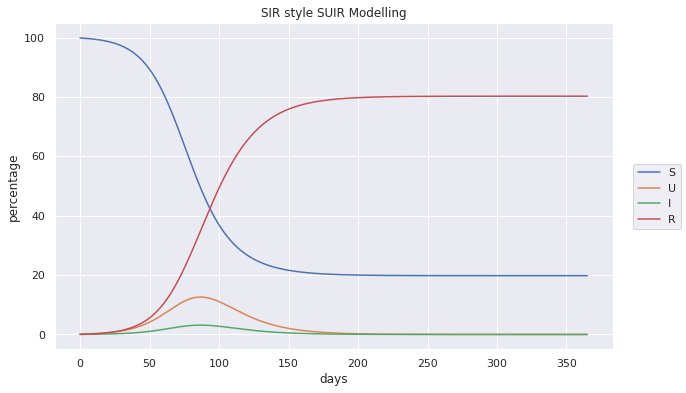

In [92]:
kappa_I = 1         # 1 => no isolation of identified spreaders.
kappa_U = 1         # 1 => no contact restrictions.
beta = 2*1/14       # 14 days. R_0=2 from Bjoernstad et al, Nature, 20 Apr 2020
gamma = 1/14
rho = 0             # 0 => no pro-active testing
epsilon = 0.2

popsize = 100       # Population size.
dt = 1              # Time unit: 1 day      
D = 365             # Simulate for D days N_t = int(D*1/dt)  
N_t = int(D*1/dt)   # Corresponding no of time steps.
t = np.linspace(0, N_t*dt, N_t+1) #timeline

t = np.linspace(0, N_t*dt, N_t+1)
S = np.zeros(N_t+1)
U = np.zeros(N_t+1)
I = np.zeros(N_t+1)
R = np.zeros(N_t+1)

# Initial conditions
S[0] = 0.999 # from Bjoernstad et al, Nature, 20 April 2020
I[0] = 0.001 # implying a poulation size of 1000. 
U[0] = 0.001 # Assuming about the same amount of unidentified as identified.
R[0] = 0

# Step equations forward in time
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*(kappa_I*I[n] + kappa_U*U[n])*S[n]
    U[n+1] = U[n] + dt*(1 - rho - epsilon)*(kappa_I*I[n] + kappa_U*U[n])*beta*S[n] - dt*gamma*U[n]
    I[n+1] = I[n] + dt*(rho + epsilon)*beta*(kappa_I*I[n] + kappa_U*U[n])*S[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*(I[n] + U[n])

fig = plt.figure(figsize= (10,6))
l1, l2, l3, l4 = plt.plot(t, S*popsize, t, U*popsize, t, I*popsize, t, R*popsize)
fig.legend((l1, l2, l3, l4), ('S','U', 'I', 'R'), 'center right')

plt.xlabel('days')
plt.ylabel('percentage')
plt.title('SIR style SUIR Modelling')
plt.grid('on')
plt.show()

The simulation above is used to confirm that our model can be based on the basic SIR model, reproducing the model by [Bjoernstad et al., *Nature*, 20 April 2020](https://www.nature.com/articles/s41592-020-0822-z) We shall next optimise the code, before starting simulation studies with the model.

### Vectorising the code for the SUIR model


A common representation of differential equations is as a vector ODE where $u$ and $f$ are vectors
$$
u'=f(u,t)
$$
For our SUIR model, we have
$$
u = \left(S(t), U(t), I(t), R(t)\right)
$$
and
$$
f(u,t) = \left(- \beta\left(\kappa_I  I + \kappa_U  U\right) S, (1-\rho - \epsilon) \beta\left(\kappa_I  I + \kappa_U  U\right)  - \gamma U ,  (\rho + \epsilon) \beta\left(\kappa_I  I + \kappa_U  U\right) S - \gamma I , \gamma ( I + U )\right)
$$
In Python, the Forward Euler step
$$
u^{n+1}=u^n+\Delta t f\left(u^n,t_n\right)
$$
whether scalar or vector is encoded in the same way: u[n+1] = u[n] + dt * f(u[n], t[n]). 

In [0]:
def ode_FE(f, U_0, dt, T, timeline, params):
    """Forward Euler method"""
    N_t = int(round(T/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array:
    f_ = lambda u, t: np.asarray(f(u, timeline, params))
    u = np.zeros((N_t+1, len(U_0)))
    t = timeline
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u

In [0]:
def f_SUIR(u, timeline, params):
    """Encoding of the SUIR model"""
    beta, gamma, rho, kappa_I, kappa_U, epsilon = params
    S, U, I, R = u
    return [-beta*(kappa_I*I + kappa_U*U)*S, (1 - rho - epsilon)*(kappa_I*I + kappa_U*U)*beta*S - gamma*U, (rho + epsilon)*beta*(kappa_I*I + kappa_U*U)*S - gamma*I, gamma*(I + U)]

### Initial conditions and population scaling

We assume that in the begining of the pandemic, in a hotspot, there are 20 unidentified spreaders per population of 100,000 and 1 identified spreader per million. Visualizing the results, we display counts per 1 million. The reason is the population of a standard administrative unit (a country or state) is of the same order.

In [0]:
# 10 indentified and 10 unidentified spreaders in a sub-population of 100,000

initial = [0.9999, 0.0002, 0.000001, 0] 

popsize = 1000000

### Time parameters


In [0]:
dt = 1              # Time unit: 1 day      
D = 365             # Simulate for D days
N_t = int(D*1/dt)   # Corresponding no of time steps.
t = np.linspace(0, N_t*dt, N_t+1) #timeline

### Simulation of the SUIR model in vector form


Since our focus is testing and contract restrictions, linked to identified and unidentified spreaders, we shall hereafter only plot $I$ and $U$, or the sum of spreaders, $U+I$.

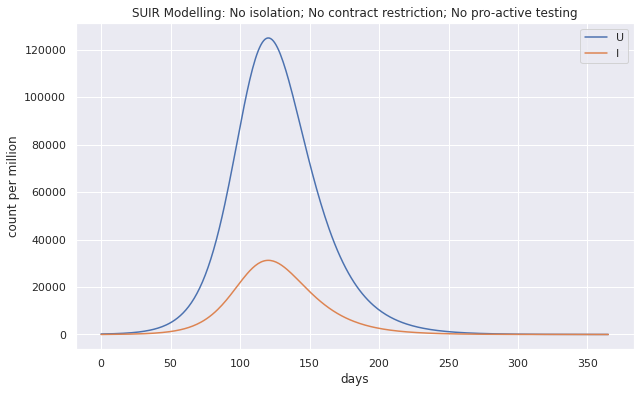

In [97]:
kappa_I = 1   # 1 => no isolation of identified spreaders.
kappa_U = 1   # 1 => no contact restrictions.
beta = 2*1/14 # 14 days. R_0=2 from Bjoernstad et al, Nature, 20 April 2020
gamma = 1/14
rho = 0       # 0 => no pro-active testing
epsilon = 0.2
params = beta, gamma, rho, kappa_I, kappa_U, epsilon

u = ode_FE(f_SUIR, initial, dt, D, t, params)

S = u[:, 0]; U = u[:, 1]; I = u[:, 2]; R = u[:, 3]

fig = plt.figure(figsize= (10,6))
ax = plt.axes(); l2, l3 = ax.plot(t, U*popsize, t, I*popsize)
plt.legend(('U', 'I')); plt.xlabel('days'); plt.ylabel('count per million')
plt.title('SUIR Modelling: No isolation; No contract restriction; No pro-active testing')
plt.grid('on'); plt.show()

The figure above is our first simulation experiment, considering a scenario in which there are no systematic measures to isolate identified spreaders, there are no contact restrictions and there is no pro-active testing. 

We emphasize again here that our model is deliberately not trying to make accurate predictions about cases numbers at a particular point in time, for a specific region or country. We are thus not fitting our model to actual data for a particular region. The focus is on studying general patterns, arising from different scenarios, combining contact restrictions with testing.

# Scenarios w.r.t isolation, contact restrictions, and pro-active testing

For the following simulation studies we consider different scenarios with changes to $\kappa_I$ (isolation), $\kappa_U$ (contact restrictions), and $\rho$ (pro-active testing). The parameters $\gamma$, $\beta$ and $\epsilon$ remain fixed (as are the initial conditions and population size).

## Scenario 1: No isolation of identified spreaders; No contact restrictions; No pro-active testing



In [0]:
kappa_I = 1   # 1 => no isolation of identified spreaders.
kappa_U = 1   # 1 => no contact restrictions.
beta = 2*1/14 # 14 days. R_0=2 from Bjoernstad et al, Nature, 20 April 2020
gamma = 1/14
rho = 0       # 0 => no pro-active testing
epsilon = 0.2
params = beta, gamma, rho, kappa_I, kappa_U, epsilon

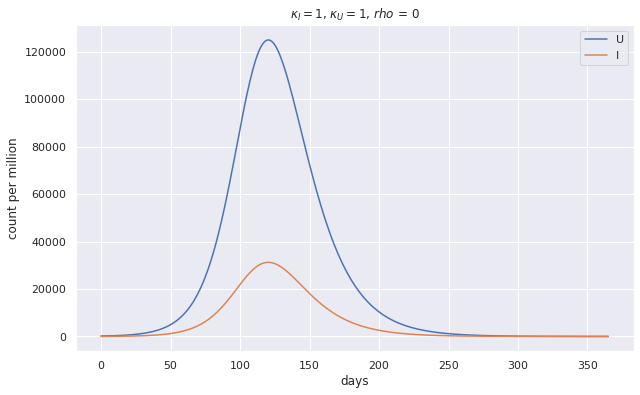

In [99]:
u_scn1 = ode_FE(f_SUIR, initial, dt, D, t, params)

S = u_scn1[:, 0]; U = u_scn1[:, 1]; I = u_scn1[:, 2]; R = u_scn1[:, 3]

scenario_1 = U + I # Sum of spreaders. Saved for summary figure.

fig = plt.figure(figsize = (10,6)); l2, l3 = plt.plot(t, U*popsize, t, I*popsize)
plt.legend(('U', 'I')); plt.xlabel('days'); plt.ylabel('count per million')
plt.title('$\kappa_I = $' + str(kappa_I) + ', $\kappa_U = $' + str(kappa_U) + ', $rho$ = ' +  str(rho))
plt.grid('on'); plt.show()

This scenario corresponds to the situation where there is no isolation of spreaders, no contact restriction and no pro-active testing. Thus, although unrealistic, this worst-case scenario can theoretically happen. Here we see the peak to be appearing at around day 120 with more than 150K (120K+30K) spreaders per million population.

## Scenario 2: Isolation of identified spreaders; No contact restrictions; No pro-active testing


In [0]:
kappa_I = .25 # 1 => Isolation of identified spreaders.
kappa_U = 1   # 1 => no contact restrictions.
beta = 2*1/14 # 14 days. R_0=2 from Bjoernstad et al, Nature, 20 April 2020
gamma = 1/14
rho = 0       # 0 => no pro-active testing
epsilon = 0.2
params = beta, gamma, rho, kappa_I, kappa_U, epsilon

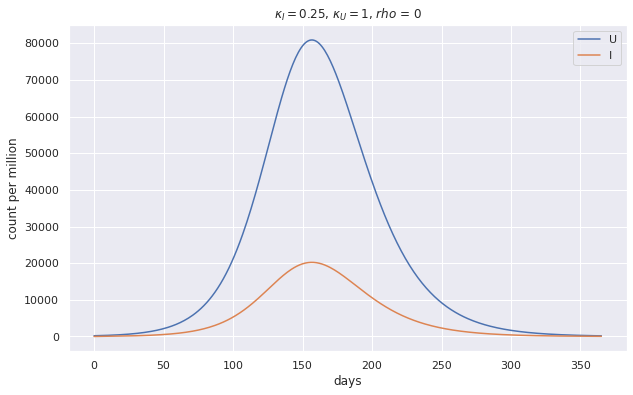

In [101]:
u_scn2 = ode_FE(f_SUIR, initial, dt, D, t, params)

S = u_scn2[:, 0]; U = u_scn2[:, 1]; I = u_scn2[:, 2]; R = u_scn2[:, 3]

scenario_2 = U + I # Sum of spreaders.

fig = plt.figure(figsize = (10,6)); l2, l3 = plt.plot(t, U*popsize, t, I*popsize)
plt.legend(('U', 'I')); plt.xlabel('days'); plt.ylabel('count per million')
plt.title('$\kappa_I = $' + str(kappa_I) + ', $\kappa_U = $' + str(kappa_U) + ', $rho$ = ' +  str(rho))
plt.grid('on'); plt.show()

This scenario corresponds to the situation where there is isolation of spreaders, no contact restriction and no pro-active testing. This scenario is more realistic compared to Scenario 1. Usually any patient with a contagious disease is quarantined by common practice. However, this scenario implies no additional measures such as contact reduction or pro-active testing that can be employed to control a pandemic. We notice here that the peak appears on day 160 with about 100K(80K+20K) spreaders per million population



## Scenario 3: Isolation of identified spreaders; Contact restrictions; No pro-active testing


In [0]:
kappa_I = .25 # 1 => good isolation of identified spreaders.
kappa_U = .75 # 1 => strict contact restrictions.
beta = 2*1/14 # 14 days. R_0=2 from Bjoernstad et al, Nature, 20 April 2020
gamma = 1/14
rho = 0       # 0 => no pro-active testing
epsilon = 0.2
params = beta, gamma, rho, kappa_I, kappa_U, epsilon

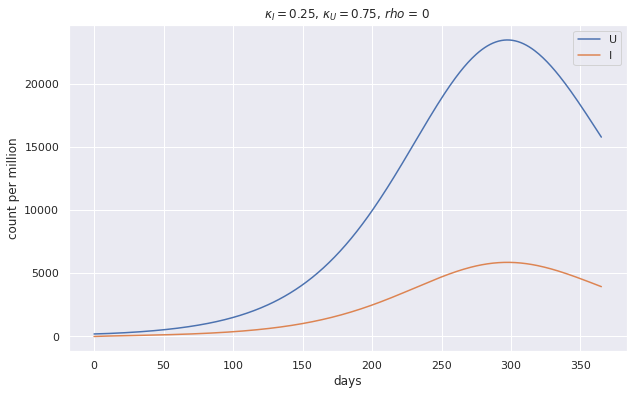

In [103]:
dt = 1              
D = 365             # Simulate for D days

u_scn3 = ode_FE(f_SUIR, initial, dt, D, t, params)

S = u_scn3[:, 0]; U = u_scn3[:, 1]; I = u_scn3[:, 2]; R = u_scn3[:, 3]

scenario_3 = U + I # Sum of spreaders.

fig = plt.figure(figsize = (10,6)); l2, l3 = plt.plot(t, U*popsize, t, I*popsize)
plt.legend(('U', 'I')); plt.xlabel('days'); plt.ylabel('count per million')
plt.title('$\kappa_I = $' + str(kappa_I) + ', $\kappa_U = $' + str(kappa_U) + ', $rho$ = ' +  str(rho))
plt.grid('on'); plt.show()

This scenario corresponds to the situation where there is isolation of spreaders, contact restriction and no pro-active testing. The assumption of contact reduction of only 25% is however time independent. This might reflect the situation in a county or state with relatively less human contacts that can be attributed to population density or lifestyle. Time independent contact rate thus makes this more of a hypothetical scenario. In this case the peak appears much later around day 300 with about 25K(20K+5K) spreaders per million. This reflects that a population with intrinsically less contact rate is likely to be at a lesser risk. 

## Scenario 4: Isolation of identified spreaders; Contact restrictions; Pro-active testing


In [0]:
kappa_I = .25 # 1 => good isolation of identified spreaders.
kappa_U = .75 # 1 => medium contact restrictions.
beta = 2*1/14 # 14 days. R_0=2 from Bjoernstad et al, Nature, 20 April 2020
gamma = 1/14
rho = 0.1     # 0 => pro-active testing
epsilon = 0.2
params = beta, gamma, rho, kappa_I, kappa_U, epsilon

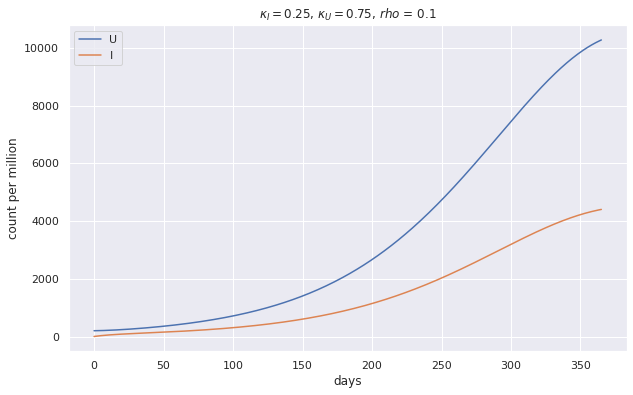

In [105]:
u_scn4 = ode_FE(f_SUIR, initial, dt, D, t, params)

S = u_scn4[:, 0]; U = u_scn4[:, 1]; I = u_scn4[:, 2]; R = u_scn4[:, 3]

scenario_4 = U + I # Sum of spreaders. This is later used to compile the plots of different scenarios.

fig = plt.figure(figsize = (10,6)); l2, l3 = plt.plot(t, U*popsize, t, I*popsize)
plt.legend(('U', 'I')); plt.xlabel('days'); plt.ylabel('count per million')
plt.title('$\kappa_I = $' + str(kappa_I) + ', $\kappa_U = $' + str(kappa_U) + ', $rho$ = ' +  str(rho))
plt.grid('on'); plt.show()

This scenario corresponds to the situation where there is isolation of spreaders, contact restriction and pro-active testing. The assumption of contact reduction and pro-active testing are however time independent which again makes this a hypothetical scenario. In this case, the peak appears even later compared to Scenario 3 after 1 year timescale. This in general shows that a 10% pro-active testing (detection of 10% of the unidentified spreaders) can have a considerable effect in further 'flattening the curve'. It is worthwhile to mention here, that this is an important observation given that the pandemic resurges after some time. If we can come up with a stable and affordable testing method before the second resurgence, we would be at a much lower risk.

## Comparing scenarios

The plot below shows for each scenario the temporal evolution of all spreaders, ie the sum of identified and unidentified spreaders.

- Scenario 1: No isolation of identified spreaders; No contact restrictions; No pro-active testing

- Scenario 2: Isolation of identified spreaders; No contact restrictions; No pro-active testing

- Scenario 3: Isolation of identified spreaders; Contact restrictions; No pro-active testing

- Scenario 4: Isolation of identified spreaders; Contact restrictions; Pro-active testing



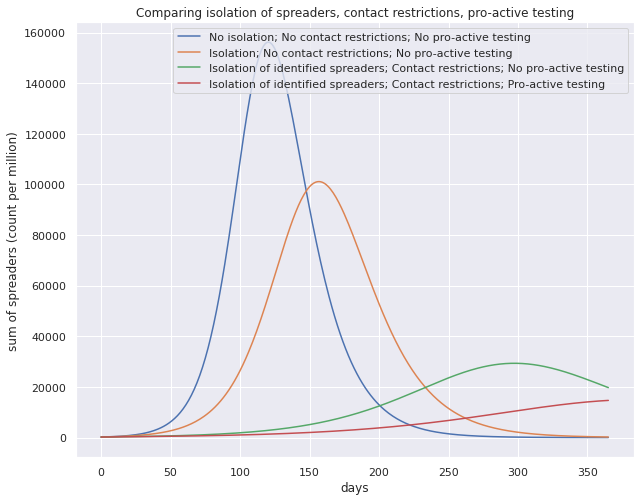

In [106]:
fig = plt.figure(figsize = (10,8))
l1, l2, l3, l4 = plt.plot(t, scenario_1*popsize, t, scenario_2*popsize, t, scenario_3*popsize, t, scenario_4*popsize)
plt.legend(('No isolation; No contact restrictions; No pro-active testing','Isolation; No contact restrictions; No pro-active testing', 'Isolation of identified spreaders; Contact restrictions; No pro-active testing', 'Isolation of identified spreaders; Contact restrictions; Pro-active testing'))
plt.xlabel('days'); plt.ylabel('sum of spreaders (count per million)')
plt.title('Comparing isolation of spreaders, contact restrictions, pro-active testing')
plt.grid('on'); plt.show()

What we see in the previous figure, showing the total number of spreaders ($U$+$I$), for the different scenarios, is the following. Scenario 1, is the worst case, with little action taken to respond to the pandemic. Scenario 2 gives people maximum freedom of movement following by strict isolation of infected individuals. The peak appears a little later compared to Scenario 1. Scenario 3, implements measures for contact restrictions, with good isolation of identified spreaders but no pro-active testing. Scenario 4, in addition to conditions of Scenario 3 there is some testing beyond people with symptoms (pro-active testing). 

Our analysis shows that Scenario 4 reflects best management of the pandemic in terms of 'flattening the curve'. The simulation confirms what other simulation studies have already shown numerous times - contract restrictions help flattening the curve and shifting the peak.

However, the simulation study above, like most others, assume static values for parameters $\kappa_I$, $\kappa_U$ and $\rho$. This might not reflect the dynamics of the pandemic, including the implementation of policies and response of the population to the pandemic. For example, if we assume $\kappa_U=0.75$, we assume that from the beginning itself there is a restriction on social interactions imposed, which is quite far from reality. For this reason, we next observe the dynamics of our pandemic model for time dependent parameters $\kappa_U$ and $\rho$. We do not assume time dependent $\kappa_I$ since, for any contagious disease (even normal flu) a diagnosed patient is quarantined anyway. We translate several time dependent parameter settings to real-world scenarios.


# Analysing late/early implementation of policies


We here consider time dependent changes in testing and contact restrictions. We introduce curves derived from the logistic function to model time dependent changes in $\kappa_U$ (linked to contact restrictions) and $\rho$ (linked to pro-active testing). Other parameters are not changed to compare the policies: $\kappa_I = 0.2$, $\beta = 0.14$, $\gamma = 0.071$, $\epsilon = 0.2$.

## Definition of policy functions

We create two functions, one modelling an increasing parameter value and another a decreasing parameter value.

For example, most countries had initially free social interactions with no restrictions, which corresponds to a higher $\kappa_U$ at the beginning of the pandemic. As the awareness about the pandemic increases and with lockdown measures implemented, social interactions are limited. We model this scenario with a flipped logistic function.

Similarly, for most countries testing would pick up over time. pro-active testing, which goes beyond testing people with symptoms, will start delayed. We model this by a time dependent $\rho$ value, following the shape of a logistic function.

In [0]:
def time_dependent_param_inc(D, param_max, param_min, growth_rate, midpoint):
  """Defining a time dependent parameter increase (logistic function)"""
  param_progression = []
  for i in range(D+1):
    param = param_min + ((param_max-param_min)/(1 + np.exp(-growth_rate*(i - midpoint))))
    param_progression.append(param)
  return(np.asarray(param_progression))

In [0]:
def time_dependent_param_dec(D, param_max, param_min, growth_rate, midpoint):
  """Defining a time dependent parameter decrease (logistic function)"""
  param_progression=[]
  for i in range(D+1):
    param = (param_min + ((param_max-param_min)/(1 + np.exp(-growth_rate*((D - i) - midpoint)))))
    param_progression.append(param)
  return(np.asarray(param_progression))

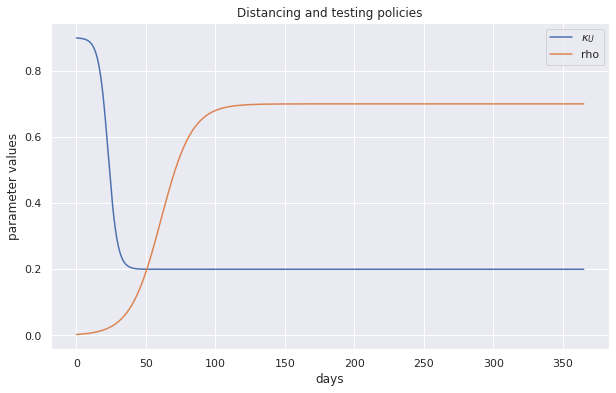

In [109]:
# A decreasing kappa_U corresponds to increasingly strict soocial distancing
kappa_U_progression = time_dependent_param_dec(D, 0.9, 0.2, 0.3, 15*D/16)
# An increasing rho corresponds to increasing pro-active testing
rho_progression = time_dependent_param_inc(D,  0.7, 0, 0.09, D/6)

fig = plt.figure(figsize= (10,6))

l1, l2 = plt.plot(t, kappa_U_progression, t, rho_progression)
plt.legend(('$\kappa_U$','rho'))
plt.xlabel('days'); plt.ylabel('parameter values')
plt.title('Distancing and testing policies')
plt.grid('on'); plt.show()

### Scenario parameters using policy functions

In [0]:
# SCENARIO 1&2
# A decreasing kappa_U corresponds to increasingly strict soocial distancing
kappa_U_progression_scn2 = time_dependent_param_dec(D, 1, 1, 0.05, D/2)
# An increasing rho corresponds to increasing pro-active testing
rho_progression_scn2 = time_dependent_param_inc(D, 0.0, 0.0, 0.05, D/2)

# SCENARIO 3
# A decreasing kappa_U corresponds to increasingly strict soocial distancing
kappa_U_progression_scn3 = time_dependent_param_dec(D, .75, .75, 0.05, D/2)
# An increasing rho corresponds to increasing pro-active testing
rho_progression_scn3 = time_dependent_param_inc(D, 0.0, 0.0, 0.05, D/2)

# SCENARIO 4
# A decreasing kappa_U corresponds to increasingly strict soocial distancing
kappa_U_progression_scn4 = time_dependent_param_dec(D, .75, .75, 0.05, D/2)
# An increasing rho corresponds to increasing pro-active testing
rho_progression_scn4 = time_dependent_param_inc(D, 0.1, 0.1, 0.05, D/2)



To compare policies in different countries, we can shift the inflection point forward or backward. For example, comparing the UK with Germany, it is widely acknowledged that widespread testing started earlier in Germany. For social distancing, comparing Norway and Sweden, Norway started social distancing much earlier than Sweden. With these policy functions above we can cover a wide range of policies through which a country or region might respond to the pandemic.

## Simulating for time-dependent parameters

In [0]:
def f_SUIR_td(u, n, timeline, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy):
    """Encoding of the SUIR model with time dependent parameters"""
    beta, gamma, kappa_I, epsilon = ti_params

    if distancing_policy == 'inc':
      param_max_kappa, param_min_kappa, growth_rate_kappa, midpoint_kappa = kappa_U_params
    elif distancing_policy == 'dec':
      param_max_kappa, param_min_kappa, growth_rate_kappa, midpoint_kappa = kappa_U_params
    else:
      pass

    if distancing_policy == 'inc':
      kappa_U = param_min_kappa + ((param_max_kappa - param_min_kappa)/(1 + np.exp(-growth_rate_kappa*(n - midpoint_kappa))))
    elif distancing_policy == 'dec': 
      kappa_U = (param_min_kappa+((param_max_kappa - param_min_kappa)/(1 + np.exp(-growth_rate_kappa*((D - n) - midpoint_kappa)))))
    else:
      pass

    param_max_rho, param_min_rho, growth_rate_rho, midpoint_rho = rho_params
    if testing_policy == 'inc':
      rho = param_min_rho + ((param_max_rho - param_min_rho)/(1 + np.exp(-growth_rate_rho*(n - midpoint_rho))))
    elif testing_policy == 'dec': 
      rho = (param_min_rho + ((param_max_rho - param_min_rho)/(1 + np.exp(-growth_rate_rho*((D - n) - midpoint_rho)))))
    else:
      pass
    S, U, I, R = u
    return [-beta*(kappa_I*I + kappa_U*U)*S, (1 - rho - epsilon)*(kappa_I*I + kappa_U*U)*beta*S - gamma*U, (rho + epsilon)*beta*(kappa_I*I + kappa_U*U)*S - gamma*I, gamma*(I + U)]

In [0]:
def ode_FE_td(f_SUIR_td, initial, dt, T, timeline, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy):
    """Forward Euler method"""
    N_t = int(round(T/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: np.asarray(f_SUIR_td(u, n, timeline, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy))
    u = np.zeros((N_t+1, len(initial)))
    t = timeline
    u[0] = initial
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u

In [0]:
kappa_I = 0.2
beta = 0.14 
gamma = 0.071 # 1/(14 days)
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters
kappa_U_params = 1, 0.3, 0.4, (365-40) # param_max_kappa, param_min_kappa, growth_rate_kappa, midpoint_kappa
rho_params = 0.7, 0.0, 0.3, 90 # param_max_rho, param_min_rho, growth_rate_rho, midpoint_rho
distancing_policy = 'dec' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend
testing_policy = 'inc' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend

In [0]:
# A decreasing kappa_U corresponds to increasingly strict soocial distancing
kappa_U_progression = time_dependent_param_dec(D, 1, 0.2, 0.3, (365-40))
# An increasing rho corresponds to increasing pro-active testing
rho_progression = time_dependent_param_inc(D, 0.7, 0, 0.3, 90)

In [0]:
u = ode_FE_td(f_SUIR_td, initial, dt, D, t, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy)
S = u[:, 0]; U = u[:, 1]; I = u[:, 2]; R = u[:, 3]

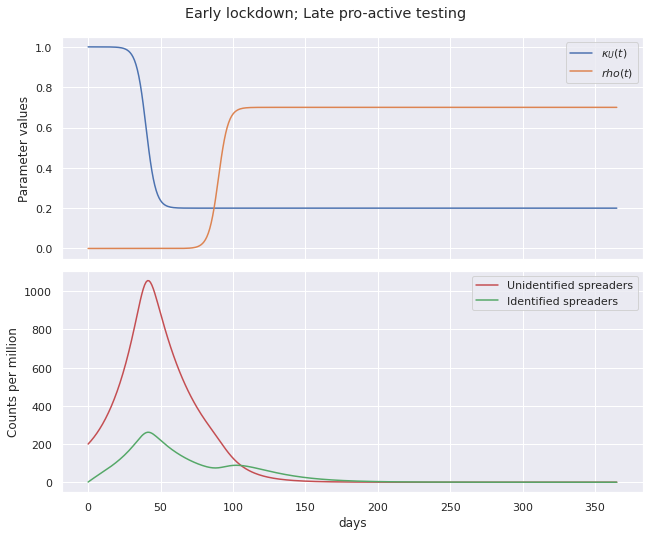

In [116]:
fig,axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression, t, rho_progression)
axs[0].set_ylabel('Parameter values')
l1,l2=axs[1].plot(t, u[:,1]*popsize, 'r', t, u[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'); axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Early lockdown; Late pro-active testing')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

## Assumptions on parameters for the implementation of policies

The COVID-10 pandemic has effected numerous countries. After about two months, the effects of different policies to deal with the pandemic at national level have emerged. Comparing the UK with Germany, it is widely acknowledged that Germany responded faster with testing and contact restriction measures. Comparing Sweden to Norway, there was a notable difference to when social distancing was enforced. (While Sweden did not enforce contact restriction measures, when the number of COVID-10 related death were rising, the behavior of people changed). Two primary aspects of a pandemic related policy, are 


*   Promptness in implementing a lockdown (total or partial)
*   Promptness in ramping up the testing procedure

There are other policies that an administrative system could adopt, such as ramping up hospital beds, and ICUs, but these are more related to dealing with the effect of the pandemic while not so much to controlling the spread of the pandemic. 

To describe the policies as we implement in our model in terms of numbers, the following points should be noted: 

*  By early lockdown, we mean that the lockdown is enforced at a timeline of approximately 40 days with contact restriction index of 0.3.
*  By late lockdown, we mean that the lockdown is enforced at a timeline of approximately 60 days with contact restriction index of 0.3.
*  By early pro-active testing, we mean that the pro-active testing starts at around 60 days with pro-active testing index of 0.7.
*  By late pro-active testing, we mean that the pro-active testing starts at around 90 days with pro-active testing index of 0.7.


## Policy 1: Early lockdown; No pro-active testing

In this scenario, we compare an early lockdown, ie an earlier restriction on social interactions, while maintaining no pro-active testing of patients 

In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters
kappa_U_params = 1, 0.3, 0.4, (365-40) # param_max_kappa, param_min_kappa, growth_rate_kappa, midpoint_kappa
rho_params = 0.0, 0.0, 0.05, D/2 # param_max_rho, param_min_rho, growth_rate_rho, midpoint_rho
distancing_policy = 'dec' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend
testing_policy = 'inc' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend

In [0]:
# A decreasing kappa_U corresponds to increasingly strict social distancing
kappa_U_progression_pol1 = time_dependent_param_dec(D, 1, 0.3, 0.4, (365-40))
# An increasing rho corresponds to increasing pro-active testing
rho_progression_pol1 = time_dependent_param_inc(D, 0.0, 0.0, 0.05, D/2)

In [0]:
u_pol1 = ode_FE_td(f_SUIR_td, initial, dt, D, t, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy)
S = u_pol1[:, 0]; U = u_pol1[:, 1]; I = u_pol1[:, 2]; R = u_pol1[:, 3]
policy_1 = U + I

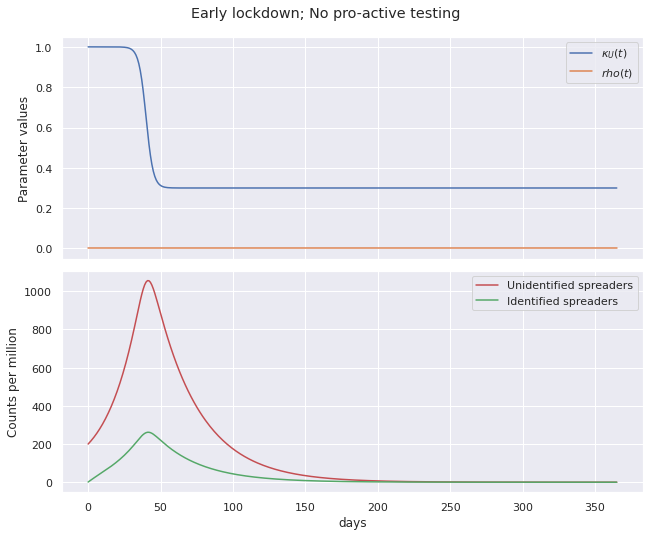

In [120]:
fig, axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression_pol1, t, rho_progression_pol1)
axs[0].set_ylabel('Parameter values')
l1,l2 = axs[1].plot(t, u_pol1[:,1]*popsize, 'r', t, u_pol1[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'); axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Early lockdown; No pro-active testing') 
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

This figure corresponds to early lockdown and no pro-active testing, while entering the pandemic. This policy is the most realistic and have been adopted by many countries/states as most counties/states do not have the possibility to have a high rate of pro-active testing. We note here that the peak appears at around 45 days with around 1300 spreaders per million.

## Policy 2: Late lockdown; No pro-active testing

In this scenario, we compare an late lockdown, ie. an earlier late on social interactions,  while performing no pro-active testing on patients

In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters
kappa_U_params = 1, 0.3, 0.4, (365-60) # param_max_kappa, param_min_kappa, growth_rate_kappa, midpoint_kappa
rho_params = 0.0, 0.0, 0.05, D/2 # param_max_rho, param_min_rho, growth_rate_rho, midpoint_rho
distancing_policy = 'dec' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend
testing_policy = 'inc' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend

In [0]:
# A decreasing kappa_U corresponds to increasingly strict social distancing
kappa_U_progression_pol2 = time_dependent_param_dec(D, 0.9, 0.3, 0.3,(365-60))
# An increasing rho corresponds to increasing pro-active testing
rho_progression_pol2 = time_dependent_param_inc(D, 0, 0.0, 0.05, D/2)

In [0]:
u_pol2 = ode_FE_td(f_SUIR_td, initial, dt, D, t, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy)
S = u_pol2[:, 0]; U = u_pol2[:, 1]; I = u_pol2[:, 2]; R = u_pol2[:, 3]
policy_2 = U + I

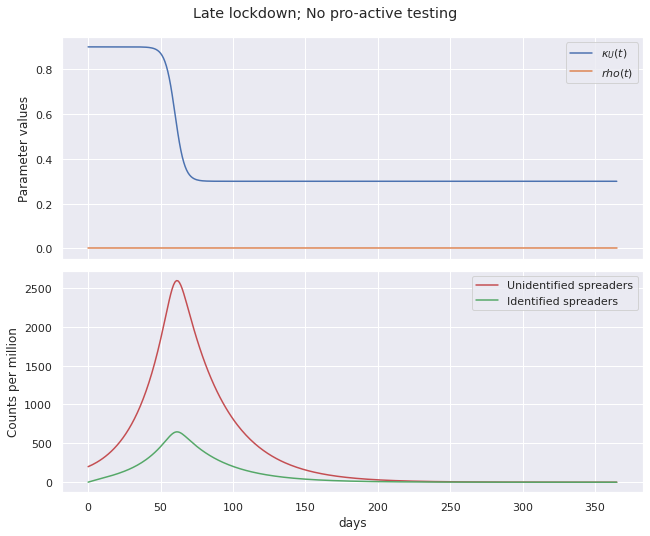

In [124]:
fig, axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5=axs[0].plot(t, kappa_U_progression_pol2, t, rho_progression_pol2)
axs[0].set_ylabel('Parameter values')
l1,l2=axs[1].plot(t, u_pol2[:,1]*popsize,'r', t, u_pol2[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million')
axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Late lockdown; No pro-active testing') # Set the title for the overall figure
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) # Adjust space in between the plots. pad is for the space at the top of the figure
plt.show()

This figure corresponds to late lockdown and no pro-active testing, while entering the pandemic. This policy reflects the possible situation in some countries/states who, might not have been prompt enough with their lockdown policy. By late lockdown, we mean that the lockdown is enforced at a timeline of approximately 60 days which is 20 days later compared to early lockdown. We note here that the peak appears at around 65 days with around more than 3000 spreaders per million. Comparing to Policy 1, we can thus conclude that a lockdown delay of 20 days might increase the number of spreaders more than twofold.

## Policy 3: No lockdown; Early pro-active testing

In this scenario, we compare an early pro-active testing, ie an earlier measures on pro-active testing, while applying no lockdown measures

In [0]:
kappa_I = 0.2
beta = 0.14 
gamma = 0.071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters
kappa_U_params = 1, 1, 0.05, D/2 # param_max_kappa, param_min_kappa, growth_rate_kappa, midpoint_kappa
rho_params = 0.7, 0.0, 0.3, 45 # param_max_rho, param_min_rho, growth_rate_rho, midpoint_rho
distancing_policy = 'dec' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend
testing_policy = 'inc' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend

In [0]:
# A decreasing kappa_U corresponds to increasingly strict social distancing
kappa_U_progression_pol3 = time_dependent_param_dec(D, 1, 1, 0.05, D/2)
# An increasing rho corresponds to increasing pro-active testing
rho_progression_pol3 = time_dependent_param_inc(D, 0.7, 0, 0.3, 60)

In [0]:
u_pol3 = ode_FE_td(f_SUIR_td, initial, dt, D, t, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy)
S = u_pol3[:, 0]; U = u_pol3[:, 1]; I = u_pol3[:, 2]; R = u_pol3[:, 3]
policy_3 = U + I

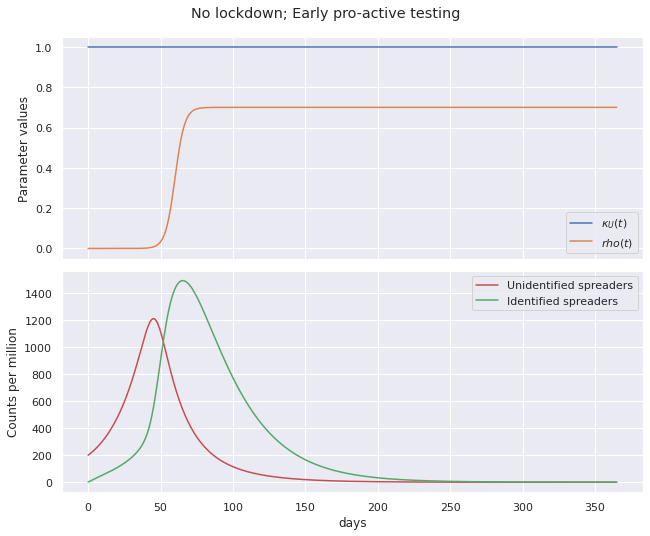

In [128]:
fig, axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5=axs[0].plot(t, kappa_U_progression_pol3, t, rho_progression_pol3)
axs[0].set_ylabel('Parameter values')
l1,l2=axs[1].plot(t, u_pol3[:,1]*popsize, 'r', t, u_pol3[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million')
axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('No lockdown; Early pro-active testing') # Set the title for the overall figure
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) # Adjust space in between the plots. pad is for the space at the top of the figure
plt.show()

This figure corresponds to no lockdown and early pro-active testing, while entering the pandemic. This policy at this point is hypothetical. However if there is future relapse of the pandemic at a time when a pro-active testing is affordable, this scenario can be of importance. We note here that the number of identified spreaders becomes higher than the number of unidentified spreaders at around 50 days. The peaks for the identified and unidentified spreaders occur at around 65 days and 45 days with 1500 and 1200 spreaders respectively. The peak numer of total spreaders is around 2200 on areound 55 days. This shows that if pro-active testing can be employed, even without any lockdown, the effect of the pandemic can be considerably diminished. 


## Policy 4: Late lockdown; Late pro-active testing

In this scenario, we compare an late pro-active testing, ie an late mesures on pro-active testing and late lockdown scenarios

In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters
kappa_U_params = 1, 0.3, 0.4, (365-60) # param_max_kappa, param_min_kappa, growth_rate_kappa, midpoint_kappa
rho_params = 0.7, 0.0, 0.3, 90 # param_max_rho, param_min_rho, growth_rate_rho, midpoint_rho
distancing_policy = 'dec' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend
testing_policy = 'inc' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend

In [0]:
# A decreasing kappa_U corresponds to increasingly strict social distancing
kappa_U_progression_pol4 = time_dependent_param_dec(D, 1, 0.3, 0.4, (365-60))
# An increasing rho corresponds to increasing pro-active testing
rho_progression_pol4 = time_dependent_param_inc(D, 0.7, 0.0, 0.3, 90)

In [0]:
u_pol4 = ode_FE_td(f_SUIR_td, initial, dt, D, t, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy)

S = u_pol4[:, 0]; U = u_pol4[:, 1]; I = u_pol4[:, 2]; R = u_pol4[:, 3]
policy_4 = U + I

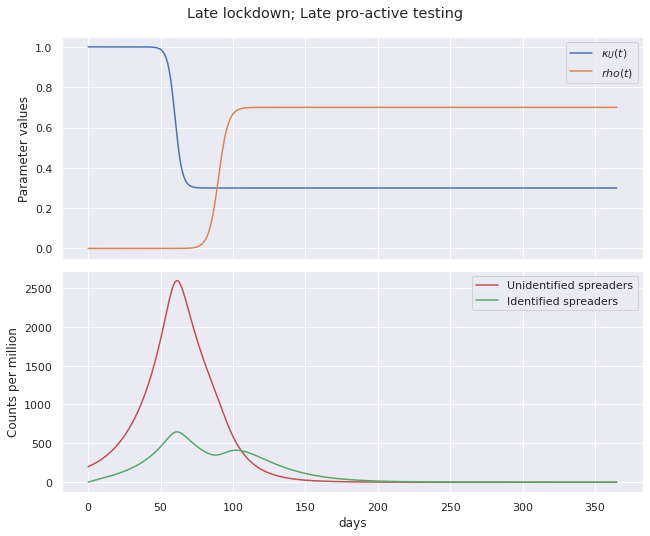

In [132]:
fig,axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression_pol4, t, rho_progression_pol4)
axs[0].set_ylabel('Parameter values')
l1,l2 = axs[1].plot(t, u_pol4[:,1]*popsize, 'r', t, u_pol4[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'); axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Late lockdown; Late pro-active testing') 
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

This figure corresponds to late lockdown and late pro-active testing, while entering the pandemic. The peak appears at around 55-60 days with around 3000(2500+500) spreaders. The delay in lockdown clearly could not be compensated with the pro active testing (which also starts late). Interestingly, this policy has more number of spreaders at its peak compared to Policy 3 where there was no lockdown at all and early pro-active testing.



## Policy 5: Early lockdown; Early pro-active testing

In this scenario, we compare an early pro-active testing, ie an early mesures on pro-active testing and early lockdown scenarios](https://)

In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon # time independent parameters
kappa_U_params = 1, 0.3, 0.4, (365-40) # param_max_kappa, param_min_kappa, growth_rate_kappa, midpoint_kappa
rho_params = 0.7, 0.0, 0.3, 45 # param_max_rho, param_min_rho, growth_rate_rho, midpoint_rho
distancing_policy = 'dec' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend
testing_policy = 'inc' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend

In [0]:
# A decreasing kappa_U corresponds to increasingly strict social distancing
kappa_U_progression_pol5 = time_dependent_param_dec(D, 1, 0.3, 0.4, (365-40))
# An increasing rho corresponds to increasing pro-active testing
rho_progression_pol5 = time_dependent_param_inc(D, 0.7, 0.0, 0.3, 50)

In [0]:
u_pol5 = ode_FE_td(f_SUIR_td, initial, dt, D, t, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy)
S = u_pol5[:, 0]; U = u_pol5[:, 1]; I = u_pol5[:, 2]; R = u_pol5[:, 3]
policy_5 = U + I

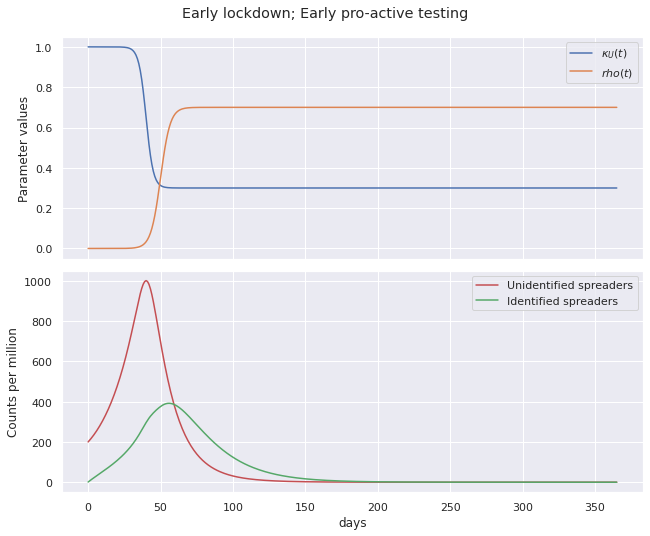

In [136]:
fig,axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression_pol5, t, rho_progression_pol5)
axs[0].set_ylabel('Parameter values')
l1,l2 = axs[1].plot(t, u_pol5[:,1]*popsize, 'r', t, u_pol5[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'); axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Early lockdown; Early pro-active testing')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

This figure corresponds to early lockdown and early pro-active testing, while entering the pandemic. This policy has been employed by South Korea to some extent. The peaks for the identified and unidentified spreaders occur at around 55 days and 45 days with 400 and 1000 spreaders respectively. Note that number of identified spreaders peak, around the time when the testing starts. Thus the peak of the identified spreaders shift to right compared to Policy 1, which corresponds to early lockdown and no proactive testing. Considering the total number of spreaders, this would be the most successful entry policy to the pandemic.

## Policy 6: Early lockdown; Late pro-active testing

In this scenario, we compare an late pro-active testing, ie an late mesures on pro-active testing and early lockdown scenarios. This is the most likely practical scenario

In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon # time independent parameters
kappa_U_params = 1, 0.3, 0.4, (365-40) # param_max_kappa, param_min_kappa, growth_rate_kappa, midpoint_kappa
rho_params = 0.7, 0.0, 0.3, 90 # param_max_rho, param_min_rho, growth_rate_rho, midpoint_rho
distancing_policy = 'dec' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend
testing_policy = 'inc' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend

In [0]:
# A decreasing kappa_U corresponds to increasingly strict social distancing
kappa_U_progression_pol6 = time_dependent_param_dec(D, 1, 0.3, 0.4, (365-40))
# An increasing rho corresponds to increasing pro-active testing
rho_progression_pol6 = time_dependent_param_inc(D, 0.7, 0.0, 0.3, 90)

In [0]:
u_pol6 = ode_FE_td(f_SUIR_td, initial, dt, D, t, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy)

S = u_pol6[:, 0]; U = u_pol6[:, 1]; I = u_pol6[:, 2]; R = u_pol6[:, 3]
policy_6 = U + I

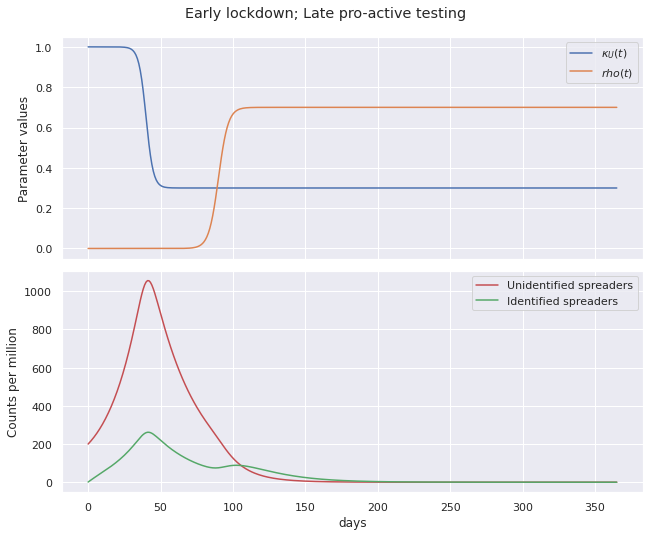

In [140]:
fig,axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression_pol6, t, rho_progression_pol6)
axs[0].set_ylabel('Parameter values')
l1,l2 = axs[1].plot(t, u_pol6[:,1]*popsize, 'r', t, u_pol6[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'); axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Early lockdown; Late pro-active testing') 
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

This figure corresponds to early lockdown and late pro-active testing, while entering the pandemic. This scenario is also likely to happen in practice, given that we one develops a pro-active testing scenario relatively later, which is more likely. The peak for this policy is around day 45 with around 1300(1050+250) spreaders. Note that number of identified spreaders show a smaller peak, around the time when the testing starts. Considering the total number of spreaders, this would be a fairly succesful entry policy to the pandemic.

## Policy 7: Late lockdown; Early pro-active testing

In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon # time independent parameters
kappa_U_params = 1, 0.3, 0.4, (365-60) # param_max_kappa, param_min_kappa, growth_rate_kappa, midpoint_kappa
rho_params = 0.7, 0.0, 0.3, 45 # param_max_rho, param_min_rho, growth_rate_rho, midpoint_rho
distancing_policy = 'dec' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend
testing_policy = 'inc' # takes value 'inc' or 'dec': 'inc' for increasing logistic trend and 'dec' for decreasing logistic trend

In [0]:
# A decreasing kappa_U corresponds to increasingly strict social distancing
kappa_U_progression_pol6 = time_dependent_param_dec(D, 1, 0.3, 0.4, (365-60))
# An increasing rho corresponds to increasing pro-active testing
rho_progression_pol6 = time_dependent_param_inc(D, 0.7, 0.0, 0.3, 45)

In [0]:
u_pol7 = ode_FE_td(f_SUIR_td, initial, dt, D, t, ti_params, kappa_U_params, rho_params, distancing_policy, testing_policy)

S = u_pol6[:, 0]; U = u_pol6[:, 1]; I = u_pol6[:, 2]; R = u_pol6[:, 3]
policy_7 = U + I

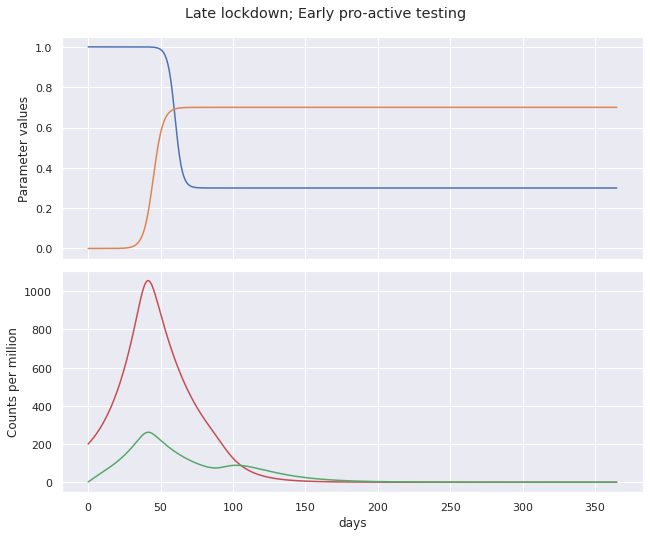

In [144]:
fig,axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression_pol6, t, rho_progression_pol6)
axs[0].set_ylabel('Parameter values')
l1,l2 = axs[1].plot(t, u_pol6[:,1]*popsize, 'r', t, u_pol6[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'); axs[1].set_xlabel('days')
 
plt.suptitle('Late lockdown; Early pro-active testing') 
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

This figure corresponds to early lockdown and late pro-active testing, while entering the pandemic. This scenario is hypothetical and unlikely to happen. The peak for this policy is around day 45 with around 1300(1050+250) spreaders. 

## Summary: Analysing late/early implementation of policies

The plot below shows for each policy the temporal evolution of spreaders, ie the sum of identified and unidentified spreaders.

- Policy 1: Early lockdown; No pro-active testing. 

- Policy 2: Late lockdown; No pro-active testing.

- Policy 3: No lockdown; Early pro-active testing.

- Policy 4: Late lockdown; Late pro-active testing.

- Policy 5: Early lockdown; Early pro-active testing.

- Policy 6: Early lockdown; Late pro-active testing 


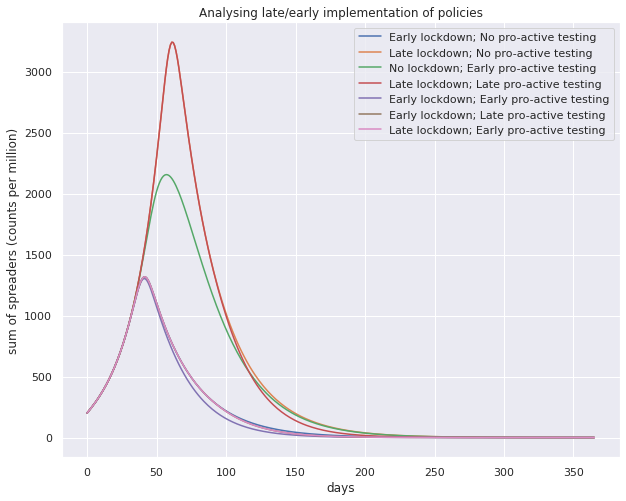

In [145]:
fig = plt.figure(figsize = (10,8))
l1, l2, l3, l4, l5, l6, l7 = plt.plot(t, policy_1*popsize, t, policy_2*popsize, t, policy_3*popsize, t, policy_4*popsize, t, policy_5*popsize, t, policy_6*popsize, t, policy_7*popsize)
plt.legend(('Early lockdown; No pro-active testing','Late lockdown; No pro-active testing', 'No lockdown; Early pro-active testing', 'Late lockdown; Late pro-active testing', 'Early lockdown; Early pro-active testing', 'Early lockdown; Late pro-active testing', 'Late lockdown; Early pro-active testing'))
plt.xlabel('days'); plt.ylabel('sum of spreaders (counts per million)')
plt.title('Analysing late/early implementation of policies')
plt.grid('on'); plt.show()

From the comparative plot of the policies, we notice that there is one group of policies leading to the same peak at aound 40 days and less than 1500 spreaders per million. This includes the following policies: 

*   Early lockdown; No pro-active testing
*   Early lockdown; Early pro-active testing
*   Early lockdown; Late pro-active testing
*   Late lockdown; Early pro-active testing

We can thus argue that a late lockdown can only be compensated for with early pro active testing. Early on in a pandemic it is however unrealistic to have available large scale random testing.

For these simulation studies we consider lockdown strategies that remain implemented. In the next section we shall investigate the question when it is best to relax a lockdown.



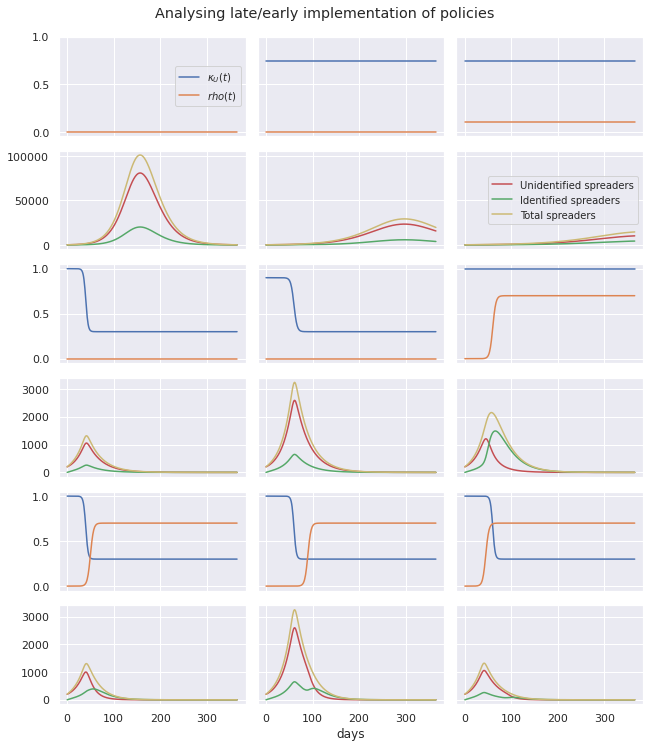

In [146]:
fig, axs = plt.subplots(6, 3, sharex='col', sharey='row', figsize=(10,11))
axs[0,0].plot(t, kappa_U_progression_scn2, t, rho_progression_scn2)
axs[0,1].plot(t, kappa_U_progression_scn3, t, rho_progression_scn3)
axs[0,1].set_ylim([-0.04,1])
axs[0,2].plot(t, kappa_U_progression_scn4, t, rho_progression_scn4)
axs[0,2].set_ylim([-0.04,1])
axs[1,0].plot(t, u_scn2[:,1]*popsize, 'r', t, u_scn2[:,2]*popsize, 'g', t, (u_scn2[:,1] + u_scn2[:,2])*popsize, 'y')
axs[1,1].plot(t, u_scn3[:,1]*popsize, 'r', t, u_scn3[:,2]*popsize, 'g', t, (u_scn3[:,1] + u_scn3[:,2])*popsize, 'y')
axs[1,2].plot(t, u_scn4[:,1]*popsize, 'r', t, u_scn4[:,2]*popsize, 'g', t, (u_scn4[:,1] + u_scn4[:,2])*popsize, 'y')
axs[2,0].plot(t, kappa_U_progression_pol1, t, rho_progression_pol1)
axs[2,1].plot(t, kappa_U_progression_pol2, t, rho_progression_pol2)
axs[2,2].plot(t, kappa_U_progression_pol3, t, rho_progression_pol3)
axs[3,0].plot(t, u_pol1[:,1]*popsize, 'r', t, u_pol1[:,2]*popsize, 'g', t, (u_pol1[:,1] + u_pol1[:,2])*popsize, 'y')
axs[3,1].plot(t, u_pol2[:,1]*popsize, 'r', t, u_pol2[:,2]*popsize, 'g', t, (u_pol2[:,1] + u_pol2[:,2])*popsize, 'y')
axs[3,2].plot(t, u_pol3[:,1]*popsize, 'r', t, u_pol3[:,2]*popsize, 'g', t, (u_pol3[:,1] + u_pol3[:,2])*popsize, 'y')
axs[4,0].plot(t, kappa_U_progression_pol5, t, rho_progression_pol5)
axs[4,1].plot(t, kappa_U_progression_pol4, t, rho_progression_pol4)
axs[4,2].plot(t, kappa_U_progression_pol6, t, rho_progression_pol6)
axs[5,0].plot(t, u_pol5[:,1]*popsize, 'r', t, u_pol5[:,2]*popsize, 'g', t, (u_pol5[:,1] + u_pol5[:,2])*popsize, 'y')
axs[5,1].plot(t, u_pol4[:,1]*popsize, 'r', t, u_pol4[:,2]*popsize, 'g', t, (u_pol4[:,1] + u_pol4[:,2])*popsize, 'y')
axs[5,1].set_xlabel('days')
axs[5,2].plot(t, u_pol6[:,1]*popsize, 'r', t, u_pol6[:,2]*popsize, 'g', t, (u_pol6[:,1] + u_pol6[:,2])*popsize, 'y')

axs[0, 0].legend(('$\kappa_U(t)$', '$rho(t)$'), prop={'size': 10}, loc=5)
axs[1, 2].legend(('Unidentified spreaders', 'Identified spreaders', 'Total spreaders'), prop={'size': 10}, loc=5)

plt.suptitle('Analysing late/early implementation of policies')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

# Analysing exit strategies from lockdown: Setup

In [0]:
def comb_decinc(entry_strategy, exit_strategy, flip_day):
 D, param_max_et, param_min_et, growth_rate_et, midpoint_et= entry_strategy
 D, param_max_ex, param_min_ex, growth_rate_ex, midpoint_ex= exit_strategy
 param_progression=[]
 for i in range(D+1):
   if i < flip_day:
     param = (param_min_et + ((param_max_et-param_min_et)/(1 + np.exp(-growth_rate_et*((D - i) - midpoint_et)))))
   else:
     param = param_min_ex + ((param_max_ex-param_min_ex)/(1 + np.exp(-growth_rate_ex*(i - midpoint_ex))))
   param_progression.append(param)
 return(np.asarray(param_progression)) 

In [0]:
def comb_incdec(entry_strategy, exit_strategy, flip_day):
 D, param_max_et, param_min_et, growth_rate_et, midpoint_et= entry_strategy
 D, param_max_ex, param_min_ex, growth_rate_ex, midpoint_ex= exit_strategy
 param_progression=[]
 for i in range(D+1):
   if i < flip_day:
     param = param_min_et + ((param_max_ex-param_min_et)/(1 + np.exp(-growth_rate_et*(i - midpoint_et))))
   else:
     param = (param_min_ex + ((param_max_et-param_min_ex)/(1 + np.exp(-growth_rate_ex*((D - i) - midpoint_ex)))))
   param_progression.append(param)
 return(np.asarray(param_progression)) 

In [0]:
def time_dependent_param_per(D, param_max, param_min, period, entry_day, exit_day):
  """Defining a time dependent parameter decrease (logistic function)"""
  param_progression=[]
  for i in range(D+1):
    if i >exit_day:
      param=1
    elif i< entry_day:
      param=1
    elif int(i/period)%3 == 0 or int(i/period)%3 == 1:
      param=param_min
    else:
      param=param_max
    param_progression.append(param)
  return(np.asarray(param_progression))

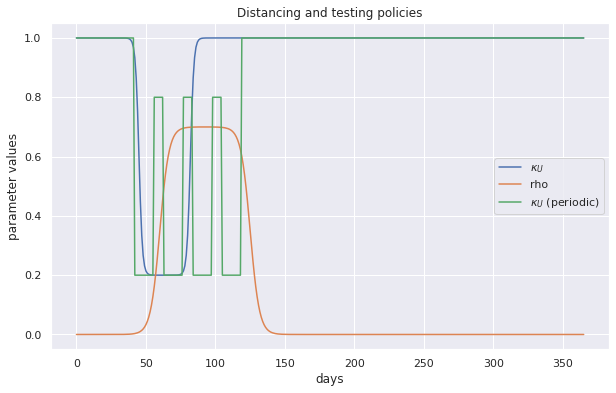

In [150]:
entry_strategy_kappa = (D, 1, 0.2, 0.8, (360-40))
exit_strategy_kappa = (D, 1, 0.2, 0.8, 82)
kappa_U_progression = comb_decinc(entry_strategy_kappa, exit_strategy_kappa , 65)

entry_strategy_rho = (D, 0.7, 0.0, 0.3, 60)
exit_strategy_rho = (D, 0.7, 0.0, 0.3, (360-120))
rho_progression = comb_incdec(entry_strategy_rho, exit_strategy_rho, 90 )

# A periodic kappa_U corresponds to periodic implementation of strict soocial distancing
kappa_U_progression_p = time_dependent_param_per(D, 0.8, .2, 7, 42, 118)

fig = plt.figure(figsize = (10,6))

l1, l2, l3 = plt.plot(t, kappa_U_progression, t, rho_progression, t, kappa_U_progression_p)
plt.legend(('$\kappa_U$','rho','$\kappa_U$ (periodic)'))
plt.xlabel('days'); plt.ylabel('parameter values')
plt.title('Distancing and testing policies')
plt.grid('on'); plt.show()

In [0]:
def f_SUIR_td_etex(u, n, timeline, ti_params, strategy_params, strategy):
    """Encoding of the SUIR model with time dependent parameters"""
    beta, gamma, kappa_I, epsilon = ti_params
    
    if strategy=='regular_lock':
      distancing_strategy=strategy_params[0]
      testing_strategy=strategy_params[1]

      entry_strategy_kaapa=distancing_strategy_params[0]
      exit_strategy_kaapa=distancing_strategy_params[1]
      flip_day_kappa= distancing_strategy_params[2]
      param_max_et_kappa, param_min_et_kappa, growth_rate_et_kappa, midpoint_et_kappa= entry_strategy_kaapa
      param_max_ex_kappa, param_min_ex_kappa, growth_rate_ex_kappa, midpoint_ex_kappa= exit_strategy_kaapa
      if n < flip_day_kappa:
        kappa_U = (param_min_et_kappa + ((param_max_et_kappa-param_min_et_kappa)/(1 + np.exp(-growth_rate_et_kappa*((D - n) - midpoint_et_kappa)))))
      else:
        kappa_U = param_min_ex_kappa + ((param_max_ex_kappa-param_min_ex_kappa)/(1 + np.exp(-growth_rate_ex_kappa*(n - midpoint_ex_kappa))))

      entry_strategy_rho=testing_strategy_params[0]
      exit_strategy_rho=testing_strategy_params[1]
      flip_day_rho= testing_strategy_params[2]
      param_max_et_rho, param_min_et_rho, growth_rate_et_rho, midpoint_et_rho= entry_strategy_rho
      param_max_ex_rho, param_min_ex_rho, growth_rate_ex_rho, midpoint_ex_rho= exit_strategy_rho
      if n < flip_day_rho:
        rho = param_min_ex_rho + ((param_max_ex_rho-param_min_ex_rho)/(1 + np.exp(-growth_rate_ex_rho*(n - midpoint_ex_rho))))
      else:
        rho = (param_min_et_rho + ((param_max_et_rho-param_min_et_rho)/(1 + np.exp(-growth_rate_et_rho*((D - n) - midpoint_et_rho)))))
    
    elif strategy=='periodic_lock':
      distancing_strategy=strategy_params[0]
      testing_strategy=strategy_params[1]
      param_max_kappa, param_min_kappa, period_kappa, entry_day_kappa, exit_day_kappa=distancing_strategy
      if n > exit_day_kappa:
        kappa_U=1
      elif n< entry_day_kappa:
        kappa_U=1
      elif int(n/period_kappa)%3 == 0 or int(n/period_kappa)%3 == 1:
        kappa_U=param_min_kappa
      else:
        kappa_U=param_max_kappa

      entry_strategy_rho=testing_strategy_params[0]
      exit_strategy_rho=testing_strategy_params[1]
      flip_day_rho= testing_strategy_params[2]
      param_max_et_rho, param_min_et_rho, growth_rate_et_rho, midpoint_et_rho= entry_strategy_rho
      param_max_ex_rho, param_min_ex_rho, growth_rate_ex_rho, midpoint_ex_rho= exit_strategy_rho
      if n < flip_day_rho:
        rho = param_min_ex_rho + ((param_max_ex_rho-param_min_ex_rho)/(1 + np.exp(-growth_rate_ex_rho*(n - midpoint_ex_rho))))
      else:
        rho = (param_min_et_rho + ((param_max_et_rho-param_min_et_rho)/(1 + np.exp(-growth_rate_et_rho*((D - n) - midpoint_et_rho)))))       

    S, U, I, R = u
    return [-beta*(kappa_I*I + kappa_U*U)*S, (1 - rho - epsilon)*(kappa_I*I + kappa_U*U)*beta*S - gamma*U, (rho + epsilon)*beta*(kappa_I*I + kappa_U*U)*S - gamma*I, gamma*(I + U)]

In [0]:
def ode_FE_td_etex(f_SUIR_td_etex, initial, dt, T, timeline, ti_params, strategy_params, strategy):
    """Forward Euler method"""
    N_t = int(round(T/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: np.asarray(f_SUIR_td_etex(u, n, timeline, ti_params, strategy_params, strategy))
    u = np.zeros((N_t+1, len(initial)))
    t = timeline
    u[0] = initial
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u

## Analysing exit strategies from lockdown: Simulation studies

 As we noticed above, 'Early lockdown and no Pro-active testing' strategy is the one that was implemented during the pandemic by numerous countries, from around the middle of March 2020. We shall therefore consider the corresponding peak as a reference and starting point to discuss the timing of relaxation measures/exit strategies. A major motivation behind studying exit strategies is to observer whether there is a chance of relapsing of the pandemic depending on exit strategies. Note that, we have assumed that  for each of the exit strategies the entry policy to the pandemic is an early lockdown (at 40 days). There are several variations of contact reduction scenarios that we compare:

 * Early abrupt exit 
 * Early gradual exit  
 * Late abrupt exit
 * Late gradual exit
 * Periodic exit

Moreover, there are two variations of pro-active testing scenarios we compare:

 * Minimal pro-active testing
 * High pro-active testing

We build each strategy as a combination of these variations of contact reduction scenarios and  pro-active testing scenarios.


### Strategy 1: Early abrupt exit; Minimal pro-active testing


In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters

entry_strategy_kappa = (1, 0.2, 1, (D-40))
exit_strategy_kappa = (1, 0.2, 1, 90)
flip_day_kappa = 82

entry_strategy_rho = (0.05, 0.0, 0.3, 60)
exit_strategy_rho = (0.05, 0.0, 0.3, (D-158))
flip_day_rho = D+1

distancing_strategy_params=(entry_strategy_kappa,exit_strategy_kappa,flip_day_kappa)
testing_strategy_params=(entry_strategy_rho,exit_strategy_rho,flip_day_rho)

strategy_params=(distancing_strategy_params,testing_strategy_params)
strategy='regular_lock'

In [0]:
entry_strategy_kappa = (D, 1, 0.2, 1, (D-40))
exit_strategy_kappa = (D, 1, 0.2, 1, 90)
kappa_U_progression_str1 = comb_decinc(entry_strategy_kappa, exit_strategy_kappa , 82)

entry_strategy_rho = (D, 0.05, 0.0, 0.3, 60)
exit_strategy_rho = (D, 0.05, 0.0, 0.3, (D-158))
rho_progression_str1 = comb_incdec(entry_strategy_rho, exit_strategy_rho, D+1)

In [0]:
u_str1 = ode_FE_td_etex(f_SUIR_td_etex, initial, dt, D, t, ti_params, strategy_params, strategy)

S = u_str1[:, 0]; U = u_str1[:, 1]; I = u_str1[:, 2]; R = u_str1[:, 3]
strategy_1 = U + I

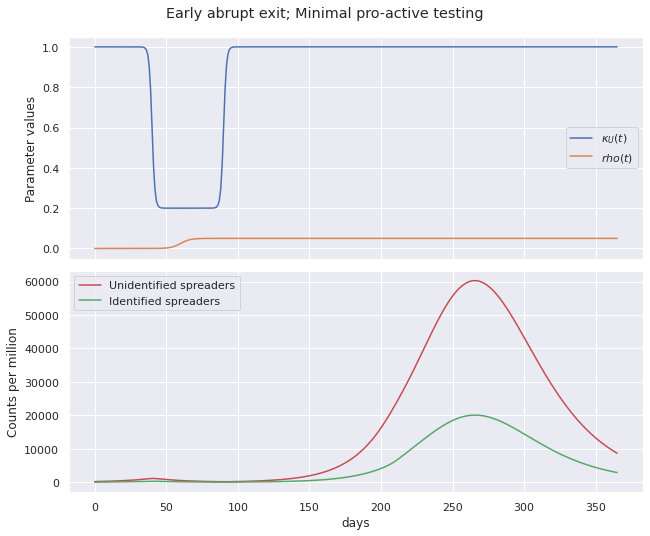

In [156]:
fig,axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression_str1, t, rho_progression_str1)
axs[0].set_ylabel('Parameter values')
l1,l2 = axs[1].plot(t, u_str1[:,1]*popsize, 'r', t, u_str1[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million')
axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Early abrupt exit; Minimal pro-active testing') 
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0)
plt.show()

Early abrupt exit; Minimal pro-active testing: This corresponds to exiting the lockdown between days 82-92. It is a sudden lift of the lockdown after a lockdown period of ~ 6 weeks. The normalcy returns after a time span of about 1 week. There is a minimal amount of pro active testing considered, which is usually closer to reality. This shows that after achieving a first peak at around 40-45th day, the pandemic subsides. But it again starts relapsing from around 120th day. Since we assume that at the time of second relapse there is no contact reduction whatsoever, the situations turns out to be quite similar to Scenario 2 discussed before. The peak number 80K(60K+20K) appearing at around day 265 is a bit less than that of Scenario 2 because of the minimal pro-active testing happening in this case as opposed to Scenario 2.  


### Strategy 2: Early gradual exit; Minimal pro-active testing



In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters

entry_strategy_kappa = (1, 0.2, 1, (D-40))
exit_strategy_kappa = (1, 0.2, .1, 145)
flip_day_kappa = 82

entry_strategy_rho = (0.05, 0.0, 0.3, 60)
exit_strategy_rho = (0.05, 0.0, 0.3, (D-158))
flip_day_rho = D+1

distancing_strategy_params=(entry_strategy_kappa,exit_strategy_kappa,flip_day_kappa)
testing_strategy_params=(entry_strategy_rho,exit_strategy_rho,flip_day_rho)

strategy_params=(distancing_strategy_params,testing_strategy_params)
strategy='regular_lock'

In [0]:
entry_strategy_kappa = (D, 1, 0.2, 1, (D-40))
exit_strategy_kappa = (D, 1, 0.2, .1, 145)
kappa_U_progression_str2 = comb_decinc(entry_strategy_kappa, exit_strategy_kappa , 82)

entry_strategy_rho = (D, 0.05, 0.0, 0.3, 60)
exit_strategy_rho = (D, 0.05, 0.0, 0.3, (D-158))
rho_progression_str2 = comb_incdec(entry_strategy_rho, exit_strategy_rho, D+1)

In [0]:
u_str2 = ode_FE_td_etex(f_SUIR_td_etex, initial, dt, D, t, ti_params, strategy_params, strategy)

S = u_str2[:, 0]; U = u_str2[:, 1]; I = u_str2[:, 2]; R = u_str2[:, 3]
strategy_2 = U + I

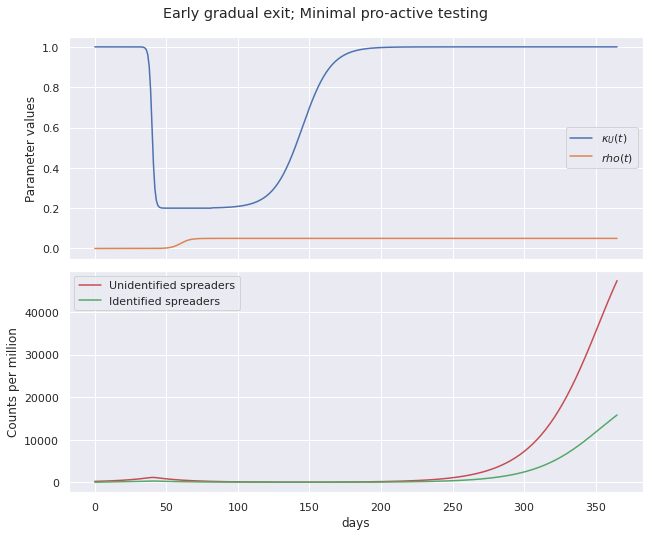

In [160]:
fig,axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression_str2, t, rho_progression_str2)
axs[0].set_ylabel('Parameter values')
l1,l2 = axs[1].plot(t, u_str2[:,1]*popsize, 'r', t, u_str2[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'); axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Early gradual exit; Minimal pro-active testing')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()


Early gradual exit; Minimal pro-active testing: This corresponds to exiting the lockdown between 82-200 days span. It is a gradual lift of the lockdown after a lockdown period of ~ 6 weeks. The normalcy returns after a time span of around 4 months. This shows that after achieving a first peak at around 40-45th day similar to Strategy 1, the pandemic subsides. But it again starts relapsing from around 220th day, much later compared to scenario one, because of the gradual lockdown exit. Except for the starting point and relative transformation of the peak, the relapse peak appearing is exactly the same in structure as of Strategy 1. 

### Strategy 3: Late abrupt exit; Minimal pro-active testing

In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters

entry_strategy_kappa = (1, 0.2, 1, (D-40))
exit_strategy_kappa = (1, 0.2, 1, 134)
flip_day_kappa = 124

entry_strategy_rho = (0.05, 0.0, 0.3, 60)
exit_strategy_rho = (0.05, 0.0, 0.3, (D-158))
flip_day_rho = D+1

distancing_strategy_params = (entry_strategy_kappa,exit_strategy_kappa,flip_day_kappa)
testing_strategy_params = (entry_strategy_rho,exit_strategy_rho,flip_day_rho)

strategy_params = (distancing_strategy_params,testing_strategy_params)
strategy='regular_lock'

In [0]:
entry_strategy_kappa = (D, 1, 0.2, 1, (D-40))
exit_strategy_kappa = (D, 1, 0.2, 1, 134)
kappa_U_progression_str3 = comb_decinc(entry_strategy_kappa, exit_strategy_kappa , 124)

entry_strategy_rho = (D, 0.05, 0.0, 0.3, 60)
exit_strategy_rho = (D, 0.05, 0.0, 0.3, (D-158))
rho_progression_str3 = comb_incdec(entry_strategy_rho, exit_strategy_rho, D+1)

In [0]:
u_str3 = ode_FE_td_etex(f_SUIR_td_etex, initial, dt, D, t, ti_params, strategy_params, strategy)

S = u_str3[:, 0]; U = u_str3[:, 1]; I = u_str3[:, 2]; R = u_str3[:, 3]
strategy_3 = U + I

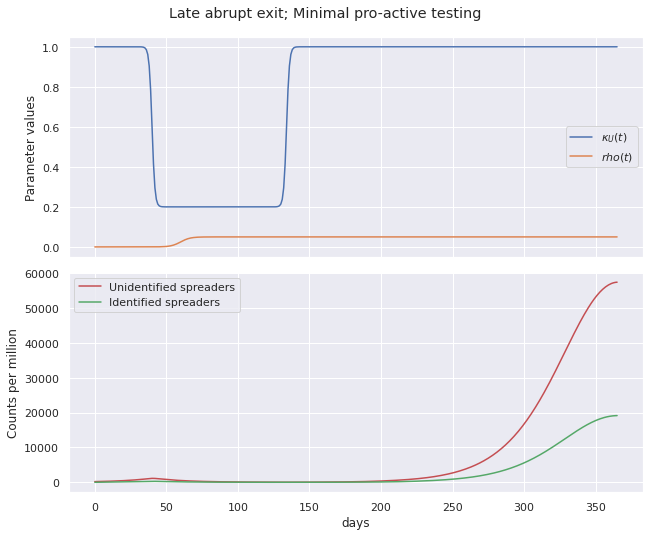

In [164]:
fig,axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression_str3, t, rho_progression_str3)
axs[0].set_ylabel('Parameter values')
l1,l2=axs[1].plot(t, u_str3[:,1]*popsize, 'r', t, u_str3[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'); axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Late abrupt exit; Minimal pro-active testing')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()


Late abrupt exit; Minimal pro-active testing: This corresponds to exiting the lockdown between days 124-134. It is a sudden lift of the lockdown after a lockdown period of ~ 12 weeks. The normalcy returns after a time span of about 1 week. The situation here is also similar that of Strategy 1, 2. 

### Strategy 4: Late gradual exit; Minimal pro-active testing

In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters

entry_strategy_kappa = (1, 0.2, 1, (D-40))
exit_strategy_kappa = (1, 0.2, .1, 187)
flip_day_kappa = 124

entry_strategy_rho = (0.05, 0.0, 0.3, 60)
exit_strategy_rho = (0.05, 0.0, 0.3, (D-158))
flip_day_rho = D+1

distancing_strategy_params = (entry_strategy_kappa,exit_strategy_kappa,flip_day_kappa)
testing_strategy_params = (entry_strategy_rho,exit_strategy_rho,flip_day_rho)

strategy_params = (distancing_strategy_params,testing_strategy_params)
strategy='regular_lock'

In [0]:
entry_strategy_kappa = (D, 1, 0.2, 1, (D-40))
exit_strategy_kappa = (D, 1, 0.2, .1, 187)
kappa_U_progression_str4 = comb_decinc(entry_strategy_kappa, exit_strategy_kappa, 124)

entry_strategy_rho = (D, 0.05, 0.0, 0.3, 60)
exit_strategy_rho = (D, 0.05, 0.0, 0.3, (D-158))
rho_progression_str4 = comb_incdec(entry_strategy_rho, exit_strategy_rho, D+1)

In [0]:
u_str4 = ode_FE_td_etex(f_SUIR_td_etex, initial, dt, D, t, ti_params, strategy_params, strategy)
S = u_str4[:, 0]; U = u_str4[:, 1]; I = u_str4[:, 2]; R = u_str4[:, 3]
strategy_4 = U + I

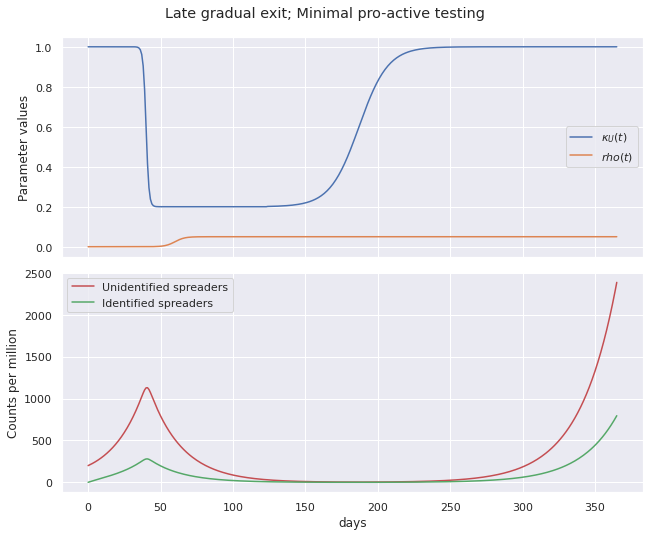

In [168]:
fig,axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression_str4, t, rho_progression_str4)
axs[0].set_ylabel('Parameter values')
l1,l2=axs[1].plot(t, u_str4[:,1]*popsize, 'r', t, u_str4[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'); axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Late gradual exit; Minimal pro-active testing') 
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

Late gradual exit; Minimal pro-active testing: This corresponds to exiting the lockdown between days 124-240. It is a gradual lift of the lockdown after a lockdown period of ~ 12 weeks. The normalcy returns after a time span of about 4 months.  The situation here is also similar that of Strategy 1, 2 and 3 except for the fact that the relapse of the pandemic occur later in time due to implementation and gradual withdrawal. We note here that even exercising a double lockdown period to that of Strategy 1 and then a gradual exit also might not be enough to prevent future relapses,  if we assume that the virus retains the same spreading potential and there is a low degree of pro-active testing. We thus conclude that there is a chance that the pandemic might relapse, within the year after lifting of a short or long lockdown, whether the lockdown is lifted abruptly or gradually, if we assume that the virus retains the same spreading potential and pro-active testing is not boosted up.

### Strategy 5: Early abrupt exit; High pro-active testing

In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters

entry_strategy_kappa = (1, 0.2, 1, (D-40))
exit_strategy_kappa = (1, 0.2, 1, 90)
flip_day_kappa = 82

entry_strategy_rho = (0.7, 0.0, 0.3, 60)
exit_strategy_rho = (0.7, 0.0, 0.3, (D-158))
flip_day_rho = 90

distancing_strategy_params = (entry_strategy_kappa,exit_strategy_kappa,flip_day_kappa)
testing_strategy_params = (entry_strategy_rho,exit_strategy_rho,flip_day_rho)

strategy_params = (distancing_strategy_params,testing_strategy_params)
strategy='regular_lock'

In [0]:
entry_strategy_kappa = (D, 1, 0.2, 1, (D-40))
exit_strategy_kappa = (D, 1, 0.2, 1, 90)
kappa_U_progression_str5 = comb_decinc(entry_strategy_kappa, exit_strategy_kappa, 82)

entry_strategy_rho = (D, 0.5, 0.0, 0.3, 60)
exit_strategy_rho = (D, 0.5, 0.0, 0.3, (D-158))
rho_progression_str5 = comb_incdec(entry_strategy_rho, exit_strategy_rho, 90)

In [0]:
u_str5 = ode_FE_td_etex(f_SUIR_td_etex, initial, dt, D, t, ti_params, strategy_params, strategy)

S = u_str5[:, 0]; U = u_str5[:, 1]; I = u_str5[:, 2]; R = u_str5[:, 3]
strategy_5=U+I

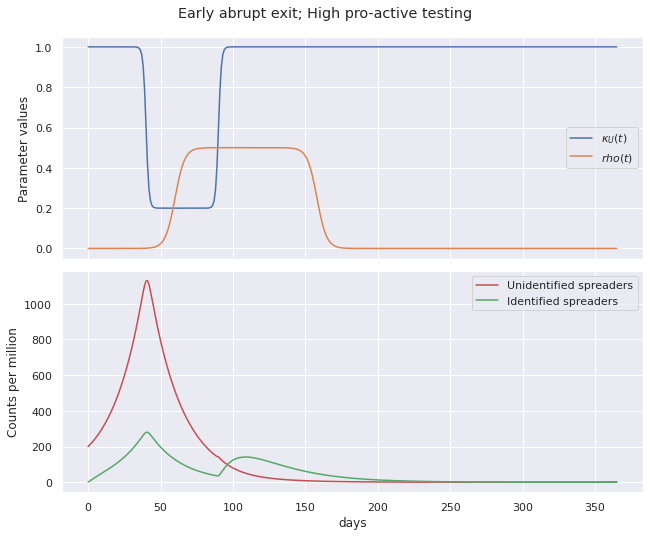

In [172]:
fig, axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5= axs[0].plot(t, kappa_U_progression_str5, t, rho_progression_str5)
axs[0].set_ylabel('Parameter values')
l1,l2= axs[1].plot(t, u_str5[:,1]*popsize, 'r', t, u_str5[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'); axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Early abrupt exit; High pro-active testing') 
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

Early abrupt exit; High pro-active testing: From Scenarios 1-4 we noticed that the pandemic might relapse within a year irrespective of when or how the lockdown is lifted assuming that the spreading potential of the virus is maintained and there is little pro-active testing. In this case we see that even if there is short lockdown and an abrupt exit, a high pro-active testing index of .7 can prevent the pandemic from relapsing. Recall here that pro-active testing should not be confused with random testing. That is, $\rho =0.7$ does not mean randomly testing $70$ percent of the population. Rather it means implementation of testing strategie that can ensure that 70% of the spreaders are detected. This can be done by:

*   Rigorous testing of persons in close contact with an identified spreader 
*   Random testing in identified hotspots



### Strategy 6: Periodic lockdown; Pro-active testing

In [0]:
kappa_I = 0.2
beta = .14 
gamma = .071
epsilon = 0.2
ti_params = beta, gamma, kappa_I, epsilon #time independent parameters

entry_strategy_rho = (0.7, 0.0, 0.3, 60)
exit_strategy_rho = (0.7, 0.0, 0.3, (D-180))
flip_day_rho = 90

distancing_strategy_params = (0.8, .2, 15, 42, 132)
testing_strategy_params = (entry_strategy_rho,exit_strategy_rho,flip_day_rho)

strategy_params = (distancing_strategy_params,testing_strategy_params)
strategy='periodic_lock'

In [0]:
entry_strategy_rho = (D, 0.5, 0.0, 0.3, 60)
exit_strategy_rho = (D, 0.5, 0.0, 0.3, (D-180))
rho_progression_str6 = comb_incdec(entry_strategy_rho, exit_strategy_rho, 90 )

# A periodic kappa_U for periodic implementation of strict soocial distancing
kappa_U_progression_str6 = time_dependent_param_per(D, 0.8, .2, 7, 42, 118)

In [0]:
u_str6 = ode_FE_td_etex(f_SUIR_td_etex, initial, dt, D, t, ti_params, strategy_params, strategy)

S = u_str6[:, 0]; U = u_str6[:, 1]; I = u_str6[:, 2]; R = u_str6[:, 3]
strategy_6= U + I

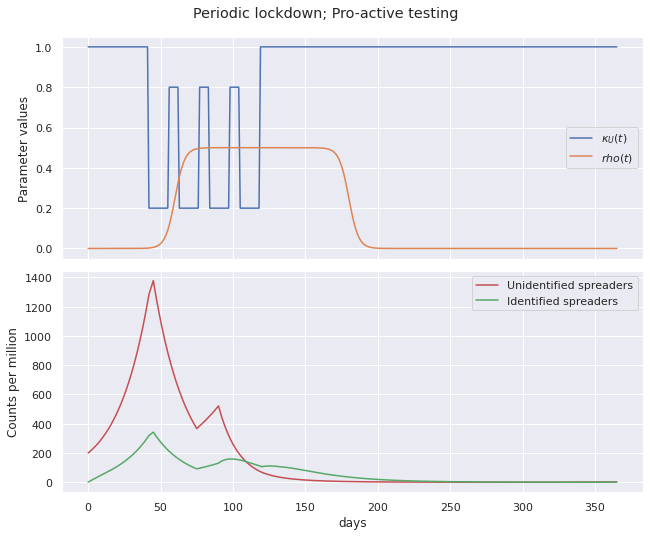

In [176]:
fig,axs = plt.subplots(2, sharex='col', sharey='row', figsize=(10,8))
l4,l5 = axs[0].plot(t, kappa_U_progression_str6, t, rho_progression_str6)
axs[0].set_ylabel('Parameter values')
l1,l2=axs[1].plot(t, u_str6[:,1]*popsize, 'r', t, u_str6[:,2]*popsize, 'g')
axs[1].set_ylabel('Counts per million'), axs[1].set_xlabel('days')
axs[0].legend(('$\kappa_U(t)$', '$rho(t)$'))
axs[1].legend(('Unidentified spreaders','Identified spreaders'))
plt.suptitle('Periodic lockdown; Pro-active testing') 
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

Periodic lockdown, Pro-active testing: This is a special case we study motivated by the study of [Uri Alon](https://medium.com/@urialonw/adaptive-cyclic-exit-strategies-from-lockdown-to-suppress-covid-19-and-allow-economic-activity-4900a86b37c7). Here lockdown is implemented on around 40th day. The lockdown is periodic with 1 month of lockdown and 15 days of no lockdown. The lockdown is completely aborted on around 120th day. 

## Summary: Analysing exit strategies from lockdown

We considered the following exit strategies:

- Exit Strategy 1: Early abrupt exit, minimal pro-active testing
- Exit Strategy 2: Early gradual exit, minimal pro-active testing
- Exit Strategy 3: Late abrupt exit, minimal pro-active testing
- Exit Strategy 4: Late gradual exit, minimal pro-active testing
- Exit Strategy 5: Early abrupt exit, high pro-active testing
- Exit Strategy 6: Periodic lockdown, Pro-active testing

In the figures below, we first plot the sum of spreaders for all strategies and then produce a panel plot, in which the parameter curves are always plotted above the simulation result.

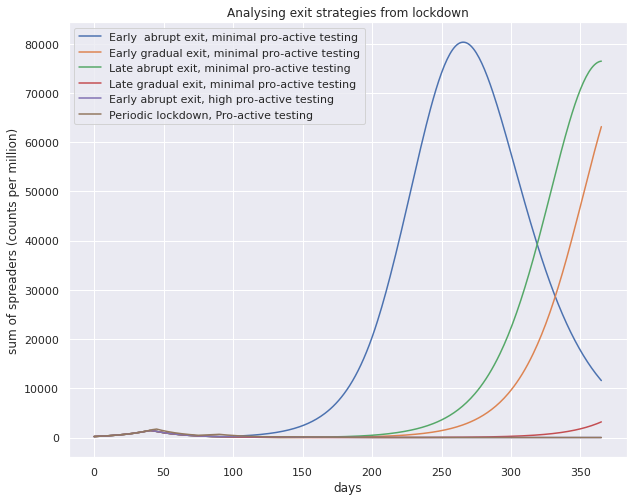

In [177]:
fig = plt.figure(figsize= (10,8))
l1, l2, l3, l4, l5, l6= plt.plot(t, strategy_1*popsize, t, strategy_2*popsize, t, strategy_3*popsize, t, strategy_4*popsize, t, strategy_5*popsize, t, strategy_6*popsize)
plt.legend(('Early  abrupt exit, minimal pro-active testing','Early gradual exit, minimal pro-active testing', 'Late abrupt exit, minimal pro-active testing', 'Late gradual exit, minimal pro-active testing', 'Early abrupt exit, high pro-active testing', 'Periodic lockdown, Pro-active testing'))
plt.xlabel('days')
plt.ylabel('sum of spreaders (counts per million)')
plt.title('Analysing exit strategies from lockdown')
plt.grid('on'); plt.show()

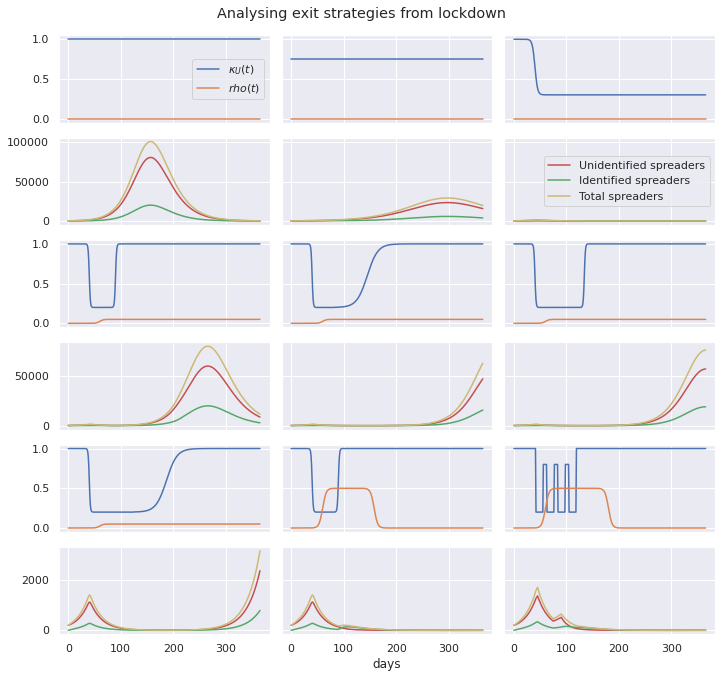

In [178]:
fig, axs = plt.subplots(6, 3, sharex='col', sharey='row', figsize=(11,10))

axs[0,0].plot(t, kappa_U_progression_scn2, t, rho_progression_scn2)
axs[0,1].plot(t, kappa_U_progression_scn3, t, rho_progression_scn3)
axs[0,2].plot(t, kappa_U_progression_pol1, t, rho_progression_pol1)

axs[1,0].plot(t, u_scn2[:,1]*popsize, 'r', t, u_scn2[:,2]*popsize, 'g', t, (u_scn2[:,1] + u_scn2[:,2])*popsize, 'y')
axs[1,1].plot(t, u_scn3[:,1]*popsize, 'r', t, u_scn3[:,2]*popsize, 'g', t, (u_scn3[:,1] + u_scn3[:,2])*popsize, 'y')
axs[1,2].plot(t, u_pol1[:,1]*popsize, 'r', t, u_pol1[:,2]*popsize, 'g', t, (u_pol1[:,1] + u_pol1[:,2])*popsize, 'y')

axs[2,0].plot(t, kappa_U_progression_str1, t, rho_progression_str1)
axs[2,1].plot(t, kappa_U_progression_str2, t, rho_progression_str2)
axs[2,2].plot(t, kappa_U_progression_str3, t, rho_progression_str3)

axs[3,0].plot(t, u_str1[:,1]*popsize, 'r', t, u_str1[:,2]*popsize, 'g', t, (u_str1[:,1] + u_str1[:,2])*popsize, 'y')
axs[3,1].plot(t, u_str2[:,1]*popsize, 'r', t, u_str2[:,2]*popsize, 'g', t, (u_str2[:,1] + u_str2[:,2])*popsize, 'y')
axs[3,2].plot(t, u_str3[:,1]*popsize, 'r', t, u_str3[:,2]*popsize, 'g', t, (u_str3[:,1] + u_str3[:,2])*popsize, 'y')

axs[4,0].plot(t, kappa_U_progression_str4, t, rho_progression_str4)
axs[4,1].plot(t, kappa_U_progression_str5, t, rho_progression_str5)
axs[4,2].plot(t, kappa_U_progression_str6, t, rho_progression_str6)

axs[5,0].plot(t, u_str4[:,1]*popsize, 'r', t, u_str4[:,2]*popsize, 'g', t, (u_str4[:,1] + u_str4[:,2])*popsize, 'y')
axs[5,1].plot(t, u_str5[:,1]*popsize, 'r', t, u_str5[:,2]*popsize, 'g', t, (u_str5[:,1] + u_str5[:,2])*popsize, 'y')
axs[5,1].set_xlabel('days')
axs[5,2].plot(t, u_str6[:,1]*popsize, 'r', t, u_str6[:,2]*popsize, 'g', t, (u_str6[:,1] + u_str6[:,2])*popsize, 'y')

axs[0, 0].legend(('$\kappa_U(t)$', '$rho(t)$'), prop={'size': 11}, loc=5)
axs[1, 2].legend(('Unidentified spreaders', 'Identified spreaders', 'Total spreaders'), prop={'size': 11}, loc=5)

plt.suptitle('Analysing exit strategies from lockdown') 
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0) 
plt.show()

The figure above summarises all simulations for different exit strategies from lockdown.

# Summary and Discussion





During the initila phase of the SARS-CoV-2 pandemic, the main question asked with mathematical modelling was about the time and size of the peak of infections.

The peak number of identified spreaders is linked to the number of hospitalisations and ICU beds required. The number of available ICU beds is known and it would be possible to decide upon a threshold that should not be exceeded. The relationship between ICU beds and identified spreaders, can be linked to the case-fatality rate (CFR) - the proportion of diagnosed people who die. Unfortunately, the estimate can vary widely. During the current SARS-CoV-2 pandemic, estimates for the CFR have ranged  from 0.1 to 15 percent. The CFR’s denominator - total cases - depends on testing and pro-active testing in particular. The CFR’s numerator - total deaths - depends on the age distribution of a population, the prevalence of preexisting illnesses, and various demographic measures, that vary among countries, states, and cities. This is one example, of how variability and thus uncertainty enters model-based predictions. The reporting of daily new numbers is also known to suffer from various artefacts arising from how the data are collected in different countries. 

The second threshold that informs policies is the lower threshold of identified cases, for which relaxation measures can be considered. Here the reproduction number $R_t$ is most widely used. There are numerous approaches to estimate the reproduction number. During the corona crisis, Germany decided on relaxation measures at the end of April, about six weeks after a lockdown was implemented. The number of new infections in Germany, end of April may thus serve as a guide for a lower threshold that should be reached for new identified spreaders, to consider a relaxation of contact restriction measures. Again, estimate of this important parameter induce uncertainty in model-based predictions.

There is however a second use of models, that are not parameterised from actual data, for a particular region or country. These models can still be useful in informing policies and decion making. The focus in then general pattern that emerge from changes to parameters. In this work, we employ this type of modelling, where we do not aim for accurate predictions of case numbers, for a particular region or country. Instead, we focus on parameter changes, linked to testing and contact restriction measures.

More speficially, the SUIR model, presented here, is used to simulate time dependent parameter changes. This allows to investigate strategies that balance pro-active testing with a lockdown. We then focus our discussion on the timing of contract restriction measures and testing. Finally, we study different strategies to exit a lockdown.  

## Comparing isolation of spreaders, contact restrictions, pro-active testing

Looking at the total number of spreaders, we found that for Scenario 1, in which identified spreaders are poorly isolated, combined with no contract restrictions and no pro-active testing is the worst case. Scenario 2 gives people maximum freedom of movement following by strict isolation of infected individuals. The peak appears a little later compared to Scenario 1. Scenario 3, implements measures for contact restrictions, with good isolation of identified spreaders but no pro-active testing. Scenario 4, in addition to conditions of Scenario 3 there is some testing beyond people with symptoms (pro-active testing).

Our analysis shows that Scenario 4 reflects best management of the pandemic in terms of 'flattening the curve'. The simulation confirms what other simulation studies have already shown numerous times - contract restrictions help considerably to flatten the curve and shifting the peak.

For these simulations, the parameter values were kept static. This might not reflect the dynamics of the pandemic, including the implementation of policies and response of the population to the pandemic. For example, if we assume  $\kappa_U = 0.75$, we assume that from the beginning itself there is a restriction on social interactions imposed, which is quite far from reality. For this reason, we next observed the dynamics of our pandemic model for time dependent parameters  $\kappa_U$  and  $\rho_U$. We did not assume time dependent  $\kappa_I$ since, for any contagious disease (even normal flu) a diagnosed patient is usually quarantined quite well. We translate several time dependent parameter settings to real-world scenarios.

## Analysing late/early implementation of policies

**Early lockdown; No pro-active testing** while entering the pandemic: This policy is the most realistic and has been adopted by many countries/states as most counties/states do not have the possibility to have a high rate of pro-active testing. We note here that the peak appears at around 45 days with around 1300 spreaders per million.

**Late lockdown; No pro-active testing** while entering the pandemic: This policy reflects the possible situation in some countries/states who, might not have been prompt enough with their lockdown policy. By late lockdown, we mean that the lockdown is enforced at a timeline of approximately 60 days which is 20 days later compared to early lockdown. We note here that the peak appears at around 65 days with around more than 3000 spreaders per million. Comparing to Policy 1, we can thus conclude that a lockdown delay of 20 days might increase the number of spreaders more than twofold.

**No lockdown; Early pro-active testing** while entering the pandemic: This policy at this point is hypothetical. However if there is future relapse of the pandemic at a time when a pro-active testing is affordable, this scenario can be of importance. We note here that the number of identified spreaders becomes higher than the number of unidentified spreaders at around 50 days. The peaks for the identified and unidentified spreaders occur at around 65 days and 45 days with 1500 and 1200 spreaders respectively. The peak number of total spreaders is around 2200 on around 55 days. This shows that if pro-active testing can be employed, even without any lockdown, the effect of the pandemic can be considerably diminished.

**Late lockdown; Late pro-active testing** while entering the pandemic: The peak appears at around 55-60 days with around 3000 (2500+500) spreaders. The delay in lockdown clearly could not be compensated with the pro active testing (which also starts late). Interestingly, this policy has more number of spreaders at its peak compared to Policy 3 where there was no lockdown at all and early pro-active testing.

**Early lockdown; Early pro-active testing** while entering the pandemic: This policy has been employed by South Korea to some extent. The peaks for the identified and unidentified spreaders occur at around 55 days and 45 days with 400 and 1000 spreaders respectively. Note that number of identified spreaders peak, around the time when the testing starts. Thus the peak of the identified spreaders shift to right compared to Policy 1, which corresponds to early lockdown and no proactive testing. Considering the total number of spreaders, this would be the most successful entry policy to the pandemic.

**Early lockdown; Late pro-active testing** while entering the pandemic: This scenario is also likely to happen in practice, given that we one develops a pro-active testing scenario relatively later, which is more likely. The peak for this policy is around day 45 with around 1300 (1050+250) spreaders. Note that number of identified spreaders show a smaller peak, around the time when the testing starts. Considering the total number of spreaders, this would be a fairly successful entry policy to the pandemic.

**Late lockdown; Early pro-active testing** while entering the pandemic: This scenario is hypothetical and unlikely to happen. The peak for this policy is around day 45 with around 1300 (1050+250) spreaders. 

For these simulation studies we considered lockdown strategies that remain implemented. We thefore then investigated the question when it is best to relax a lockdown.

## Analysing exit strategies from lockdown

**Early abrupt exit; Minimal pro-active testing:** This corresponds to exiting the lockdown between days 82-92. It is a sudden lift of the lockdown after a lockdown period of about 6 weeks. The normalcy returns after a time span of about 1 week. There is a minimal amount of pro active testing considered, which is usually closer to reality. This shows that after achieving a first peak at around 40-45th day, the pandemic subsides. But it again starts relapsing from around 120th day. Since we assume that at the time of second relapse there is no contact reduction whatsoever, the situations turns out to be quite similar to Scenario 2 discussed before. The peak number 80K (60K+20K) appearing at around day 265 is a bit less than that of Scenario 2 because of the minimal pro-active testing happening in this case as opposed to Scenario 2. 

**Early gradual exit; Minimal pro-active testing:** This corresponds to exiting the lockdown between 82-200 days span. It is a gradual lift of the lockdown after a lockdown period of about 6 weeks. The normalcy returns after a time span of around 4 months. This shows that after achieving a first peak at around 40-45th day similar to Strategy 1, the pandemic subsides. But it again starts relapsing from around 220th day, much later compared to scenario one, because of the gradual lockdown exit. Except for the starting point and relative transformation of the peak, the relapse peak appearing is exactly the same in structure as of Strategy 1.

**Late abrupt exit; Minimal pro-active testing:** This corresponds to exiting the lockdown between days 124-134. It is a sudden lift of the lockdown after a lockdown period of about 12 weeks. The normalcy returns after a time span of about 1 week. The situation here is also similar that of Strategy 1, 2. 

**Late gradual exit; Minimal pro-active testing:** This corresponds to exiting the lockdown between days 124-240. It is a gradual lift of the lockdown after a lockdown period of about 12 weeks. The normality returns after a time span of about 4 months.  The situation here is also similar that of Strategy 1, 2 and 3 except for the fact that the relapse of the pandemic occur later in time due to implementation and gradual withdrawal. We note here that even exercising a double lockdown period to that of Strategy 1 and then a gradual exit also might not be enough to prevent future relapses,  if we assume that the virus retains the same spreading potential and there is a low degree of pro-active testing. We thus conclude that there is a chance that the pandemic might relapse, within the year after lifting of a short or long lockdown, whether the lockdown is lifted abruptly or gradually, if we assume that the virus retains the same spreading potential and pro-active testing is not boosted up.

**Early abrupt exit; High pro-active testing:** From Scenarios 1-4 we noticed that the pandemic might relapse within a year irrespective of when or how the lockdown is lifted assuming that the spreading potential of the virus is maintained and there is little pro-active testing. In this case we see that even if there is short lockdown and an abrupt exit, a high pro active testing index of .7 can prevent the pandemic from relapsing. Recall here that pro-active testing should not be confused with random testing. That is, $\rho =0.7$ does not mean randomly testing $70$ percent of the population. Rather it means implementation of testing strategy that can ensure that 70% of the spreaders are detected. This can be done by:

- Rigorous testing of persons in close contact with an identified spreader 
- Random testing in identified hotspots

**Periodic lockdown, Pro-active testing:** This is a special case we study motivated by the study of Uri Alon. Here lockdown is implemented on around 40th day. The lockdown is periodic with 1 month of lockdown and 15 days of no lockdown. The lockdown is completely aborted on around 120th day.

# Conclusions

- Maintaining some degree of contact reduction can make a big difference in case there is a second wave of the pandemic. In practice this might translate to at least avoiding large gatherings.  

- A delayed lockdown has a considerable impact on the number of infections. A delay of only 20 days can increase the number of spreaders at least twofold. In case there is a second wave of the pandemic, early lockdown is thus a very effective measures, provided there is no means of pro-active testing. In our analyses, we assumed an early lockdown to start about 40 days after the first cases.

- If pro-active testing can be employed early, even without any lockdown, the effect of the pandemic can be considerably reduced. This is an important conclusion considering the negative socio-economic effects of a total lockdown. 

- Ideally early implementation of lockdown and pro-active testing produces the best results in terms of controlling the number of spreaders. Keeping in mind the possibility of a second wave, we must also note that a late lockdown and late pro-active testing might be much less effective than no lockdown and early pro-active testing. This again emphasizes the importance of developing a pro-active testing strategy before a second wave of the pandemic hits.

- For strategies that are implemented and maintained indefinitely, there is a chance that the pandemic will relapse, within the year after lifting of a short or long lockdown. 

- Maintaining a high level of pro-active testing, up to two months after the lockdown is lifted, reduces the risk of the second wave to appear early. This can buy more time to develop a permanent solution such as a vaccine.

- Considering the socio-economic impact of a total lockdown, a cyclic pattern of lockdown and release, is a promising strategy. A periodic lockdown, along with a high level of pro-active testing maintained two months after the lockdown is aborted, is a feasible measure to control the pandemic, while maintaining a socio-economic balance.
